#### <p style="background-color: #EDE7F6; color: #6600ff;margin:0; display:inline-block;padding:.6rem;border-radius:.25rem;">Introduction</p>

 #### <p style="background-color: #EDE7F6;color:#6600ff;display: inline-block;padding:.6rem;border-radius:.5rem">Import libraries</p>

In [7]:
import pandas as pd
import numpy as np
import scipy.stats as stats
import seaborn as sns
import matplotlib.pyplot as plt
import random
from IPython.display import display, HTML
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.feature_selection import mutual_info_classif
import warnings

 #### <p style="background-color: #EDE7F6;color:#6600ff;display: inline-block;padding:.6rem;border-radius:.5rem">Settings</p>

In [209]:
pd.options.display.max_rows = 100
pd.options.display.max_columns = 100
pd.options.display.max_colwidth = 1000
# pd.options.display.precision = 5
warnings.filterwarnings('ignore')

 #### <p style="background-color: #EDE7F6;color:#6600ff;display: inline-block;padding:.6rem;border-radius:.5rem">Import data files</p>

In [211]:
# train = pd.read_csv('train.csv', index_col='Id')
# test = pd.read_csv('test.csv', index_col='Id')
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

In [171]:
train = train.sample(460)

### <p style="background-color: #EDE7F6; color: #6600ff;margin:0; display:inline-block;padding:.6rem;border-radius:.25rem;">I.DATA PREPARATION</p>

#### <p style="background-color: #EDE7F6; color: #6600ff;margin:0; display:inline-block;padding:.6rem;border-radius:.25rem;">A.EDA ( Exploratory Data Analysis)</p>

 #### <p style="background-color: #EDE7F6;color:#6600ff;display: inline-block;padding:.6rem;border-radius:.5rem">A1.Reading Data</p>

In [13]:
train.head(3)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
607,608,20,RL,78.0,7800,Pave,NaN,Reg,Bnk,AllPub,Inside,Mod,Edwards,Norm,Norm,1Fam,2Story,5,8,1948,2002,Gable,CompShg,MetalSd,MetalSd,NaN,0.0,TA,Gd,CBlock,TA,Gd,No,GLQ,603,Unf,0,293,896,GasA,Ex,Y,SBrkr,1112,896,0,2008,1,0,3,0,3,1,Ex,8,Typ,0,NaN,Attchd,1948.0,Unf,1,230,TA,TA,Y,103,0,0,0,0,0,NaN,NaN,NaN,0,8,2006,WD,Normal,225000
177,178,50,RL,NaN,13650,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Sawyer,Norm,Norm,1Fam,1.5Fin,5,5,1958,1958,Gable,CompShg,MetalSd,MetalSd,NaN,0.0,Gd,Gd,CBlock,TA,TA,No,ALQ,57,BLQ,441,554,1052,GasA,Ex,Y,SBrkr,1252,668,0,1920,1,0,2,0,4,1,Gd,8,Typ,1,Gd,Attchd,1958.0,Unf,2,451,TA,TA,Y,0,0,0,0,0,0,NaN,NaN,NaN,0,7,2006,WD,Normal,172500
487,488,20,RL,70.0,12243,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,NWAmes,Norm,Norm,1Fam,1Story,5,6,1971,1971,Gable,CompShg,Plywood,Plywood,NaN,0.0,TA,TA,CBlock,Gd,TA,Av,ALQ,998,Unf,0,486,1484,GasA,Gd,Y,SBrkr,1484,0,0,1484,0,0,2,0,3,1,TA,7,Typ,1,TA,Attchd,1971.0,Unf,2,487,TA,TA,Y,224,0,0,0,180,0,NaN,NaN,NaN,0,2,2007,WD,Normal,175000


 #### <p style="background-color: #EDE7F6;color:#6600ff;display: inline-block;padding:.6rem;border-radius:.5rem">A2.Data Size</p>

In [14]:
train.shape

(460, 81)

In [15]:
print(f'{train.memory_usage().sum()/(1000000)} MB')

0.30176 MB


 #### <p style="background-color: #EDE7F6;color:#6600ff;display: inline-block;padding:.6rem;border-radius:.5rem">A3.Data Types</p>

In [16]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 460 entries, 607 to 975
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             460 non-null    int64  
 1   MSSubClass     460 non-null    int64  
 2   MSZoning       460 non-null    object 
 3   LotFrontage    371 non-null    float64
 4   LotArea        460 non-null    int64  
 5   Street         460 non-null    object 
 6   Alley          30 non-null     object 
 7   LotShape       460 non-null    object 
 8   LandContour    460 non-null    object 
 9   Utilities      460 non-null    object 
 10  LotConfig      460 non-null    object 
 11  LandSlope      460 non-null    object 
 12  Neighborhood   460 non-null    object 
 13  Condition1     460 non-null    object 
 14  Condition2     460 non-null    object 
 15  BldgType       460 non-null    object 
 16  HouseStyle     460 non-null    object 
 17  OverallQual    460 non-null    int64  
 18  OverallCond  

 #### <p style="background-color: #EDE7F6;color:#6600ff;display: inline-block;padding:.6rem;border-radius:.5rem">A4.Summary Statistics</p>

In [17]:
train.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,460.000000,460.000000,371.000000,460.000000,460.000000,460.000000,460.000000,460.000000,458.000000,460.000000,460.000000,460.000000,460.000000,460.000000,460.000000,460.000000,460.000000,460.000000,460.000000,460.000000,460.000000,460.000000,460.000000,460.000000,460.000000,437.000000,460.000000,460.000000,460.000000,460.000000,460.000000,460.000000,460.000000,460.000000,460.00000,460.000000,460.000000,460.000000
mean,728.717391,55.750000,69.679245,10025.839130,5.986957,5.558696,1969.689130,1984.286957,95.984716,449.636957,55.602174,537.371739,1042.610870,1147.252174,348.345652,5.791304,1501.389130,0.447826,0.060870,1.517391,0.389130,2.847826,1.043478,6.493478,0.595652,1977.286041,1.758696,473.189130,93.891304,42.417391,26.443478,4.408696,16.078261,1.113043,45.66087,6.200000,2007.815217,176454.971739
std,421.336170,41.769579,21.849536,5121.175956,1.328358,1.059674,30.349042,20.602267,160.048494,421.872913,175.142271,421.709627,390.288976,345.681855,432.112201,49.107857,485.949811,0.515020,0.248287,0.546051,0.514169,0.799439,0.204153,1.520363,0.644723,24.135951,0.723426,206.906863,127.767444,67.942496,69.624569,36.709338,58.409105,23.872123,410.22114,2.636099,1.304670,69423.498412
min,1.000000,20.000000,21.000000,1680.000000,2.000000,2.000000,1880.000000,1950.000000,0.000000,0.000000,0.000000,0.000000,0.000000,480.000000,0.000000,0.000000,480.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,3.000000,0.000000,1910.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,1.000000,2006.000000,34900.000000
25%,345.500000,20.000000,59.500000,7694.250000,5.000000,5.000000,1953.750000,1965.000000,0.000000,0.000000,0.000000,211.500000,801.500000,887.000000,0.000000,0.000000,1151.000000,0.000000,0.000000,1.000000,0.000000,2.000000,1.000000,5.750000,0.000000,1959.000000,1.000000,321.250000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,4.000000,2007.000000,132000.000000
50%,750.500000,50.000000,70.000000,9407.000000,6.000000,5.000000,1971.000000,1993.000000,0.000000,414.500000,0.000000,447.000000,998.500000,1090.500000,0.000000,0.000000,1442.000000,0.000000,0.000000,2.000000,0.000000,3.000000,1.000000,6.000000,1.000000,1977.000000,2.000000,480.000000,0.000000,16.000000,0.000000,0.000000,0.000000,0.000000,0.00000,6.000000,2008.000000,160000.000000
75%,1080.250000,70.000000,80.000000,11451.250000,7.000000,6.000000,1999.000000,2003.000000,153.750000,720.250000,0.000000,792.500000,1285.750000,1360.250000,729.000000,0.000000,1744.750000,1.000000,0.000000,2.000000,1.000000,3.000000,1.000000,7.000000,1.000000,2000.000000,2.000000,576.000000,165.000000,63.000000,0.000000,0.000000,0.000000,0.000000,0.00000,8.000000,2009.000000,207700.000000
max,1460.000000,190.000000,174.000000,57200.000000,10.000000,9.000000,2009.000000,2010.000000,922.000000,2260.000000,1127.000000,2336.000000,3138.000000,3138.000000,1538.000000,528.000000,4676.000000,2.000000,2.000000,3.000000,2.000000,6.000000,2.000000,12.000000,3.000000,2010.000000,4.000000,1220.000000,736.000000,547.000000,552.000000,508.000000,480.000000,512.000000,8300.00000,12.000000,2010.000000,556581.000000


In [21]:
# Function to style tables
def style_table(df):
    styled_df = df.style.set_table_styles([
        {"selector": "th", "props": [("color", "white"), ("background-color", "#14adc6")]}
    ]).set_properties(**{"text-align": "center"}).hide(axis="index")
    return styled_df.to_html()

# Function to generate random shades of color
def generate_random_color():
    color = "#{:02x}{:02x}{:02x}".format(
        random.randint(150, 255),
        random.randint(150, 255)
    )
    return color

# Function to create styled heading with emojis
def styled_heading(text, background_color='#14adc6', text_color='white'):
    return f"""
    <div style="
        text-align: center;
        background: {background_color};
        color: {text_color};
        padding: 15px;
        font-size: 30px;
        font-weight: bold;
        line-height: 1;
        border-radius: 20px 20px 0 0;
        margin-bottom: 20px;
        box-shadow: 0px 4px 6px rgba(0, 0, 0, 0.2);
        border: 3px dashed {background_color};
    ">
        {text}
    </div>
    """

def print_dataset_analysis(dataset, dataset_name, n_top=5, heading_color='#14adc6', text_color='white'):
    heading = styled_heading(f"🔍 {dataset_name} Overview", heading_color, text_color)
    display(HTML(heading))
    
    display(HTML("<h2 style='font-size: 24px;'>Shape of the Dataset</h2>"))
    display(HTML(f"<p>{dataset.shape[0]} rows and {dataset.shape[1]} columns</p>"))
    
    display(HTML("<h2 style='font-size: 24px;'>First 5 Rows</h2>"))
    display(HTML(style_table(dataset.head(n_top))))
    
    display(HTML("<h2 style='font-size: 24px;'>Summary Statistics</h2>"))
    display(HTML(style_table(dataset.describe())))
    
    display(HTML("<h2 style='font-size: 24px;'>Null Values</h2>"))
    null_counts = dataset.isnull().sum()
    if null_counts.sum() == 0:
        display(HTML("<p>No null values found.</p>"))
    else:
        display(HTML(style_table(null_counts[null_counts > 0].to_frame(name='Null Values'))))
    
    display(HTML("<h2 style='font-size: 24px;'>Duplicate Rows</h2>"))
    duplicate_count = dataset.duplicated().sum()
    display(HTML(f"<p>{duplicate_count} duplicate rows found.</p>"))
    
    display(HTML("<h2 style='font-size: 24px;'>Data Types</h2>"))
    dtypes_table = pd.DataFrame({
        'Data Type': [dataset[col].dtype for col in dataset.columns],
        'Column Name': dataset.columns
    })
    display(HTML(style_table(dtypes_table)))

    display(HTML("<h2 style='font-size: 24px;'>Column Names</h2>"))
    display(HTML(f"<p>{', '.join(dataset.columns)}</p>"))

    display(HTML("<h2 style='font-size: 24px;'>Unique Values</h2>"))
    unique_values_table = pd.DataFrame({
        'Data Type': [dataset[col].dtype for col in dataset.columns],
        'Column Name': dataset.columns,
        'Unique Values': [', '.join(map(str, dataset[col].unique()[:7])) for col in dataset.columns]
    })
    display(HTML(style_table(unique_values_table)))



print_dataset_analysis(train, "Training Data")
# print_dataset_analysis(test, "Test Data", heading_color='#ffd700')


Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
608,20,RL,78.000000,7800,Pave,nan,Reg,Bnk,AllPub,Inside,Mod,Edwards,Norm,Norm,1Fam,2Story,5,8,1948,2002,Gable,CompShg,MetalSd,MetalSd,nan,0.000000,TA,Gd,CBlock,TA,Gd,No,GLQ,603,Unf,0,293,896,GasA,Ex,Y,SBrkr,1112,896,0,2008,1,0,3,0,3,1,Ex,8,Typ,0,nan,Attchd,1948.000000,Unf,1,230,TA,TA,Y,103,0,0,0,0,0,nan,nan,nan,0,8,2006,WD,Normal,225000
178,50,RL,nan,13650,Pave,nan,Reg,Lvl,AllPub,Inside,Gtl,Sawyer,Norm,Norm,1Fam,1.5Fin,5,5,1958,1958,Gable,CompShg,MetalSd,MetalSd,nan,0.000000,Gd,Gd,CBlock,TA,TA,No,ALQ,57,BLQ,441,554,1052,GasA,Ex,Y,SBrkr,1252,668,0,1920,1,0,2,0,4,1,Gd,8,Typ,1,Gd,Attchd,1958.000000,Unf,2,451,TA,TA,Y,0,0,0,0,0,0,nan,nan,nan,0,7,2006,WD,Normal,172500
488,20,RL,70.000000,12243,Pave,nan,IR1,Lvl,AllPub,Inside,Gtl,NWAmes,Norm,Norm,1Fam,1Story,5,6,1971,1971,Gable,CompShg,Plywood,Plywood,nan,0.000000,TA,TA,CBlock,Gd,TA,Av,ALQ,998,Unf,0,486,1484,GasA,Gd,Y,SBrkr,1484,0,0,1484,0,0,2,0,3,1,TA,7,Typ,1,TA,Attchd,1971.000000,Unf,2,487,TA,TA,Y,224,0,0,0,180,0,nan,nan,nan,0,2,2007,WD,Normal,175000
433,160,RM,24.000000,1920,Pave,nan,Reg,Lvl,AllPub,Inside,Gtl,BrDale,Norm,Norm,TwnhsE,2Story,5,5,1971,1971,Gable,CompShg,HdBoard,HdBoard,BrkFace,376.000000,TA,TA,CBlock,TA,TA,No,ALQ,471,Unf,0,294,765,GasA,Ex,Y,SBrkr,765,600,0,1365,1,0,1,1,2,1,TA,6,Min1,0,nan,Detchd,1971.000000,Unf,2,440,TA,TA,Y,240,36,0,0,0,0,nan,nan,nan,0,8,2007,WD,Normal,122500
1004,90,RL,nan,11500,Pave,nan,IR1,Lvl,AllPub,Corner,Gtl,NWAmes,Feedr,RRAn,Duplex,1Story,5,6,1976,1976,Gable,CompShg,VinylSd,VinylSd,BrkFace,164.000000,TA,TA,CBlock,TA,TA,No,Unf,0,Unf,0,1680,1680,GasA,Fa,Y,SBrkr,1680,0,0,1680,0,0,2,0,4,2,TA,8,Typ,0,nan,Detchd,1976.000000,Unf,2,528,TA,TA,Y,0,0,0,0,0,0,nan,nan,nan,0,6,2007,WD,Normal,136905


Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
460.000000,460.000000,371.000000,460.000000,460.000000,460.000000,460.000000,460.000000,458.000000,460.000000,460.000000,460.000000,460.000000,460.000000,460.000000,460.000000,460.000000,460.000000,460.000000,460.000000,460.000000,460.000000,460.000000,460.000000,460.000000,437.000000,460.000000,460.000000,460.000000,460.000000,460.000000,460.000000,460.000000,460.000000,460.000000,460.000000,460.000000,460.000000
728.717391,55.750000,69.679245,10025.839130,5.986957,5.558696,1969.689130,1984.286957,95.984716,449.636957,55.602174,537.371739,1042.610870,1147.252174,348.345652,5.791304,1501.389130,0.447826,0.060870,1.517391,0.389130,2.847826,1.043478,6.493478,0.595652,1977.286041,1.758696,473.189130,93.891304,42.417391,26.443478,4.408696,16.078261,1.113043,45.660870,6.200000,2007.815217,176454.971739
421.336170,41.769579,21.849536,5121.175956,1.328358,1.059674,30.349042,20.602267,160.048494,421.872913,175.142271,421.709627,390.288976,345.681855,432.112201,49.107857,485.949811,0.515020,0.248287,0.546051,0.514169,0.799439,0.204153,1.520363,0.644723,24.135951,0.723426,206.906863,127.767444,67.942496,69.624569,36.709338,58.409105,23.872123,410.221140,2.636099,1.304670,69423.498412
1.000000,20.000000,21.000000,1680.000000,2.000000,2.000000,1880.000000,1950.000000,0.000000,0.000000,0.000000,0.000000,0.000000,480.000000,0.000000,0.000000,480.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,3.000000,0.000000,1910.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
345.500000,20.000000,59.500000,7694.250000,5.000000,5.000000,1953.750000,1965.000000,0.000000,0.000000,0.000000,211.500000,801.500000,887.000000,0.000000,0.000000,1151.000000,0.000000,0.000000,1.000000,0.000000,2.000000,1.000000,5.750000,0.000000,1959.000000,1.000000,321.250000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000,2007.000000,132000.000000
750.500000,50.000000,70.000000,9407.000000,6.000000,5.000000,1971.000000,1993.000000,0.000000,414.500000,0.000000,447.000000,998.500000,1090.500000,0.000000,0.000000,1442.000000,0.000000,0.000000,2.000000,0.000000,3.000000,1.000000,6.000000,1.000000,1977.000000,2.000000,480.000000,0.000000,16.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,160000.000000
1080.250000,70.000000,80.000000,11451.250000,7.000000,6.000000,1999.000000,2003.000000,153.750000,720.250000,0.000000,792.500000,1285.750000,1360.250000,729.000000,0.000000,1744.750000,1.000000,0.000000,2.000000,1.000000,3.000000,1.000000,7.000000,1.000000,2000.000000,2.000000,576.000000,165.000000,63.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,207700.000000
1460.000000,190.000000,174.000000,57200.000000,10.000000,9.000000,2009.000000,2010.000000,922.000000,2260.000000,1127.000000,2336.000000,3138.000000,3138.000000,1538.000000,528.000000,4676.000000,2.000000,2.000000,3.000000,2.000000,6.000000,2.000000,12.000000,3.000000,2010.000000,4.000000,1220.000000,736.000000,547.000000,552.000000,508.000000,480.000000,512.000000,8300.000000,12.000000,2010.000000,556581.000000


Null Values
89
430
279
2
12
12
12
12
12
1


Data Type,Column Name
int64,Id
int64,MSSubClass
object,MSZoning
float64,LotFrontage
int64,LotArea
object,Street
object,Alley
object,LotShape
object,LandContour
object,Utilities


Data Type,Column Name,Unique Values
int64,Id,"608, 178, 488, 433, 1004, 1421, 794"
int64,MSSubClass,"20, 50, 160, 90, 60, 30, 190"
object,MSZoning,"RL, RM, FV, RH, C (all)"
float64,LotFrontage,"78.0, nan, 70.0, 24.0, 90.0, 76.0, 65.0"
int64,LotArea,"7800, 13650, 12243, 1920, 11500, 11700, 9158"
object,Street,"Pave, Grvl"
object,Alley,"nan, Pave, Grvl"
object,LotShape,"Reg, IR1, IR2, IR3"
object,LandContour,"Bnk, Lvl, Low, HLS"
object,Utilities,AllPub


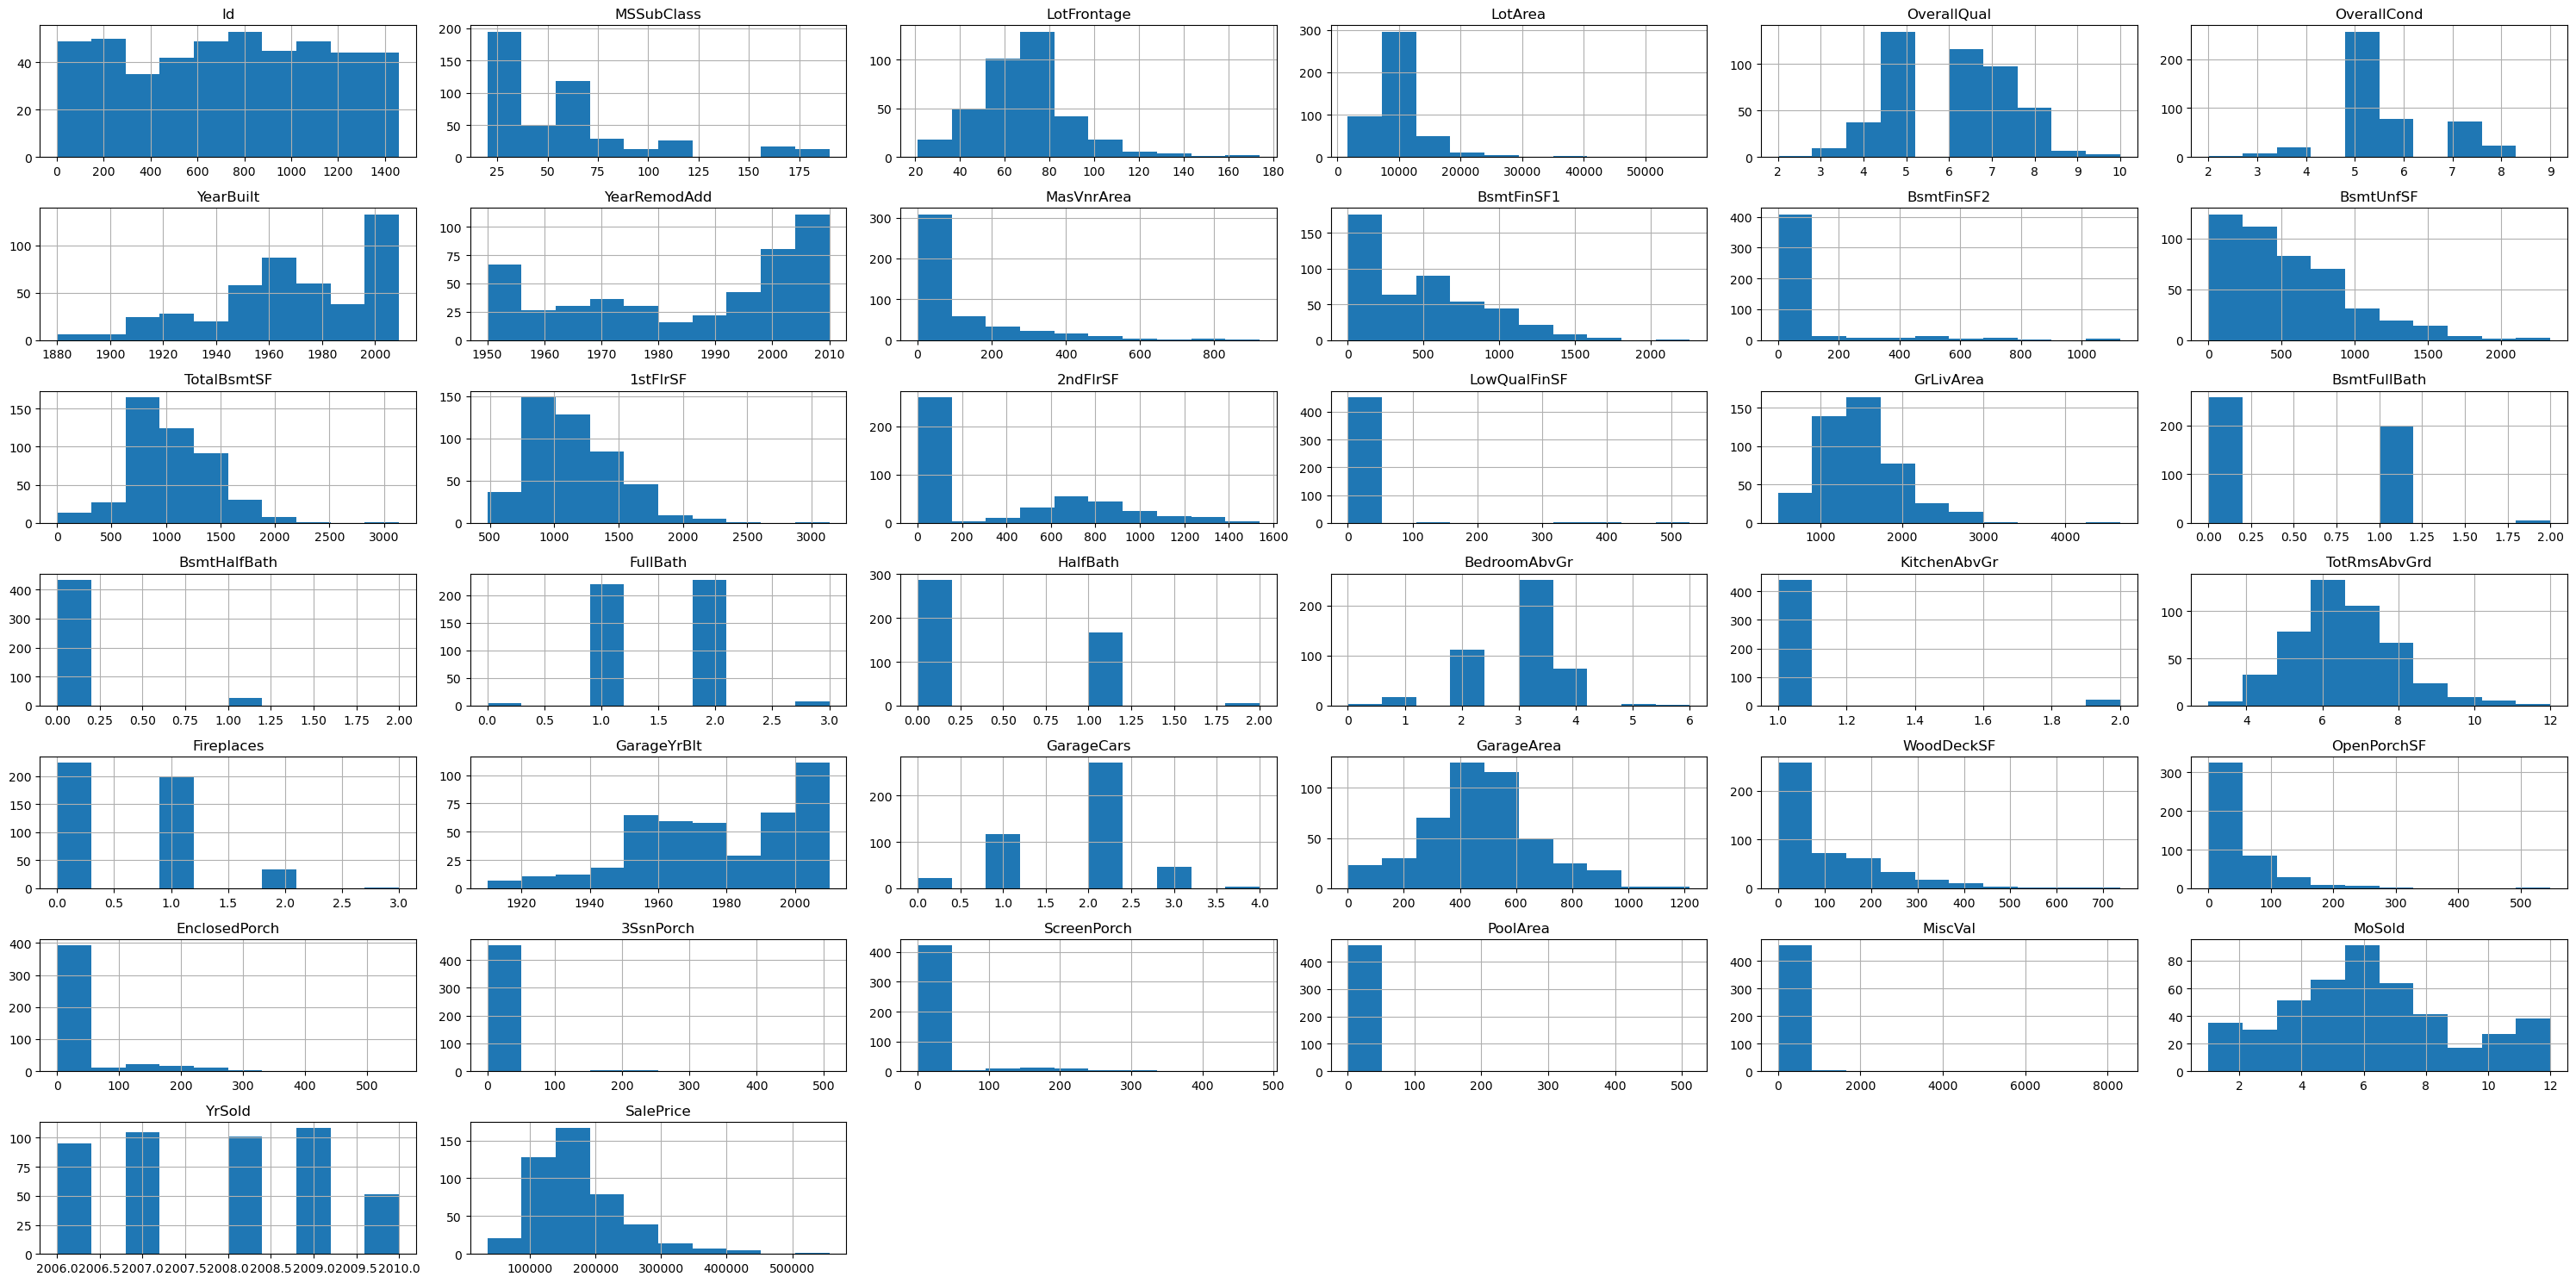

In [22]:
import matplotlib.pyplot as plt

train.hist(figsize=(30,15))
plt.tight_layout()
plt.show()

#### <p style="background-color: #EDE7F6; color: #6600ff;margin:0; display:inline-block;padding:.6rem;border-radius:.25rem;">B.Data Pre-processing</p>

 #### <p style="background-color: #EDE7F6;color:#6600ff;display: inline-block;padding:.6rem;border-radius:.5rem">B1.Missing Values (drop nulls)</p>

In [212]:
train.isnull().sum().sort_values(ascending=False)

PoolQC           1453
MiscFeature      1406
Alley            1369
Fence            1179
MasVnrType        872
FireplaceQu       690
LotFrontage       259
GarageYrBlt        81
GarageCond         81
GarageType         81
GarageFinish       81
GarageQual         81
BsmtFinType2       38
BsmtExposure       38
BsmtQual           37
BsmtCond           37
BsmtFinType1       37
MasVnrArea          8
Electrical          1
Id                  0
Functional          0
Fireplaces          0
KitchenQual         0
KitchenAbvGr        0
BedroomAbvGr        0
HalfBath            0
FullBath            0
BsmtHalfBath        0
TotRmsAbvGrd        0
GarageCars          0
GrLivArea           0
GarageArea          0
PavedDrive          0
WoodDeckSF          0
OpenPorchSF         0
EnclosedPorch       0
3SsnPorch           0
ScreenPorch         0
PoolArea            0
MiscVal             0
MoSold              0
YrSold              0
SaleType            0
SaleCondition       0
BsmtFullBath        0
HeatingQC 

In [213]:
Missing = train.isna().mean()*100 # percentage of missing columns
High_missing_columns = Missing[Missing>45]
High_missing_columns.reset_index() 
High_missing_columns.sort_values(ascending=False,inplace =True)
High_missing_columns

PoolQC         99.520548
MiscFeature    96.301370
Alley          93.767123
Fence          80.753425
MasVnrType     59.726027
FireplaceQu    47.260274
dtype: float64

In [214]:
colums_to_drop = train.columns[Missing>45]
colums_to_drop

Index(['Alley', 'MasVnrType', 'FireplaceQu', 'PoolQC', 'Fence', 'MiscFeature'], dtype='object')

In [215]:
train= train.drop(columns = colums_to_drop) 
test = test.drop(columns = colums_to_drop)

 #### <p style="background-color: #EDE7F6;color:#6600ff;display: inline-block;padding:.6rem;border-radius:.5rem">B2.Aggregate Categorical and Numerical</p>

In [216]:
numerical_columns = train.select_dtypes(exclude=['object', 'category'])
numerical_columns.columns

Index(['Id', 'MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual',
       'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd',
       'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF',
       'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea',
       'MiscVal', 'MoSold', 'YrSold', 'SalePrice'],
      dtype='object')

In [217]:
categorical_columns = train.select_dtypes(include=['object', 'category'])
categorical_columns.columns

Index(['MSZoning', 'Street', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual', 'Functional',
       'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive',
       'SaleType', 'SaleCondition'],
      dtype='object')

 #### <p style="background-color: #EDE7F6;color:#6600ff;display: inline-block;padding:.6rem;border-radius:.5rem">B3.Filling Nulls</p>

In [219]:
def fill_empty_categorical(df):
    for i in categorical_columns:
        df[i].fillna(df[i].mode()[0], inplace=True)
    return df

def fill_empty_numerical(df):
    for i in numerical_columns:
        df[i].fillna(df[i].median(), inplace=True)  
    return df

train = fill_empty_categorical(train)
train = fill_empty_numerical(train)

test = fill_empty_categorical(test)
test = fill_empty_numerical(test)

KeyError: 'SalePrice'

In [220]:
train.isnull().sum().sort_values(ascending=False)

Id               0
GarageYrBlt      0
Fireplaces       0
Functional       0
TotRmsAbvGrd     0
KitchenQual      0
KitchenAbvGr     0
BedroomAbvGr     0
HalfBath         0
FullBath         0
BsmtHalfBath     0
BsmtFullBath     0
GrLivArea        0
LowQualFinSF     0
2ndFlrSF         0
1stFlrSF         0
Electrical       0
GarageType       0
GarageFinish     0
HeatingQC        0
GarageCars       0
SaleCondition    0
SaleType         0
YrSold           0
MoSold           0
MiscVal          0
PoolArea         0
ScreenPorch      0
3SsnPorch        0
EnclosedPorch    0
OpenPorchSF      0
WoodDeckSF       0
PavedDrive       0
GarageCond       0
GarageQual       0
GarageArea       0
CentralAir       0
Heating          0
MSSubClass       0
YearBuilt        0
OverallQual      0
HouseStyle       0
BldgType         0
Condition2       0
Condition1       0
Neighborhood     0
LandSlope        0
LotConfig        0
Utilities        0
LandContour      0
LotShape         0
Street           0
LotArea     

 #### <p style="background-color: #EDE7F6;color:#6600ff;display: inline-block;padding:.6rem;border-radius:.5rem">B4.Remove Duplicates and Unnecessary Columns</p>

In [221]:
train.duplicated().sum()

0

In [222]:
test.duplicated().sum()

0

In [223]:
train = train.drop(['Utilities','Street','Id'], axis=1).copy()
test = test.drop(['Utilities','Street','Id'], axis=1).copy()

#### <p style="background-color: #EDE7F6; color: #6600ff;margin:0; display:inline-block;padding:.6rem;border-radius:.25rem;">C.Data Processing</p>

In [224]:
X = train.drop(columns=['SalePrice']).copy()
y = train['SalePrice']

#### <p style="background-color: #EDE7F6; color: #6600ff;margin:0; display:inline-block;padding:.6rem;border-radius:.25rem;">C1.Get Dummies</p>

In [225]:
num_cols = X.select_dtypes('bool').columns
num_cols

Index([], dtype='object')

In [226]:
categorical_cols = [cname for cname in X.columns if  
                        X[cname].dtype in ['object','category'] and X[cname].nunique() <6]
categorical_cols

['MSZoning',
 'LotShape',
 'LandContour',
 'LotConfig',
 'LandSlope',
 'BldgType',
 'ExterQual',
 'ExterCond',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'HeatingQC',
 'CentralAir',
 'Electrical',
 'KitchenQual',
 'GarageFinish',
 'GarageQual',
 'GarageCond',
 'PavedDrive']

In [229]:
num_cols = [cname for cname in X.columns if  
                        X[cname].dtype in ['float64'] and X[cname].nunique() <6]
num_cols

[]

In [230]:
X = pd.get_dummies(X, columns=categorical_cols)
test = pd.get_dummies(test, columns=categorical_cols)

#### <p style="background-color: #EDE7F6; color: #6600ff;margin:0; display:inline-block;padding:.6rem;border-radius:.25rem;">C2.Skewness of distributions</p>

In [231]:
numerical_columns = X.select_dtypes(include=['number']).columns
numerical_columns

Index(['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond',
       'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2',
       'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces',
       'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal',
       'MoSold', 'YrSold'],
      dtype='object')

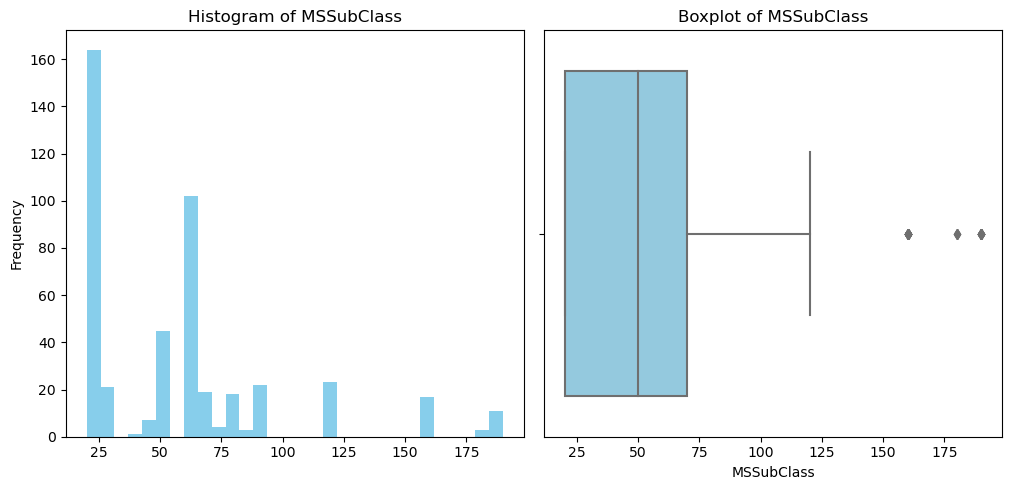

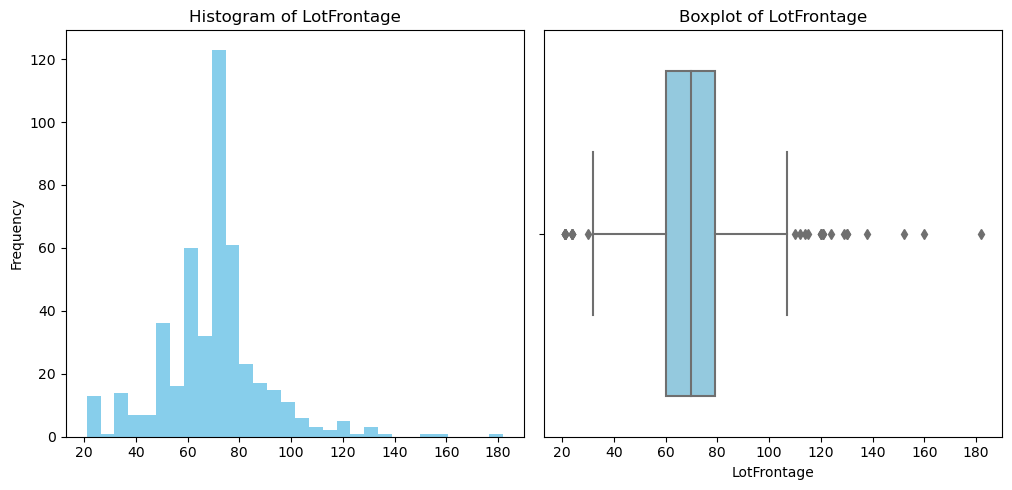

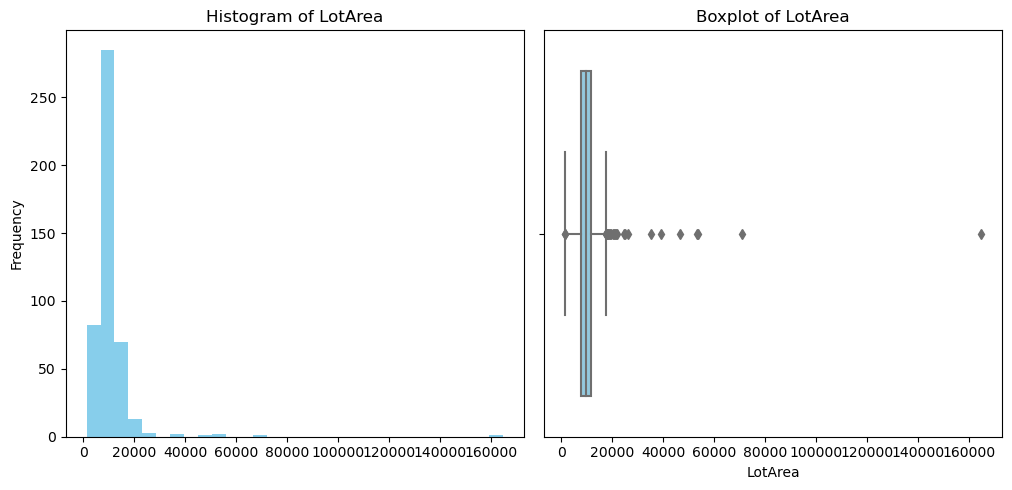

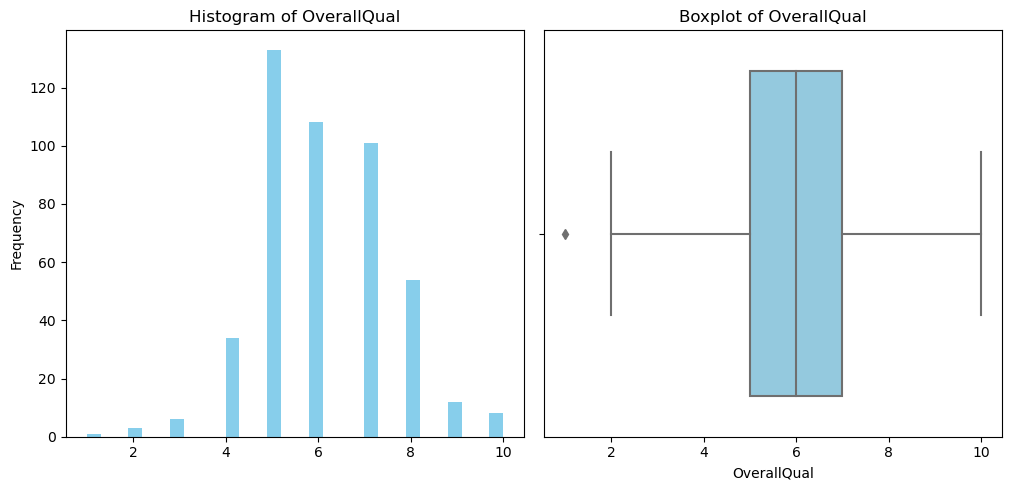

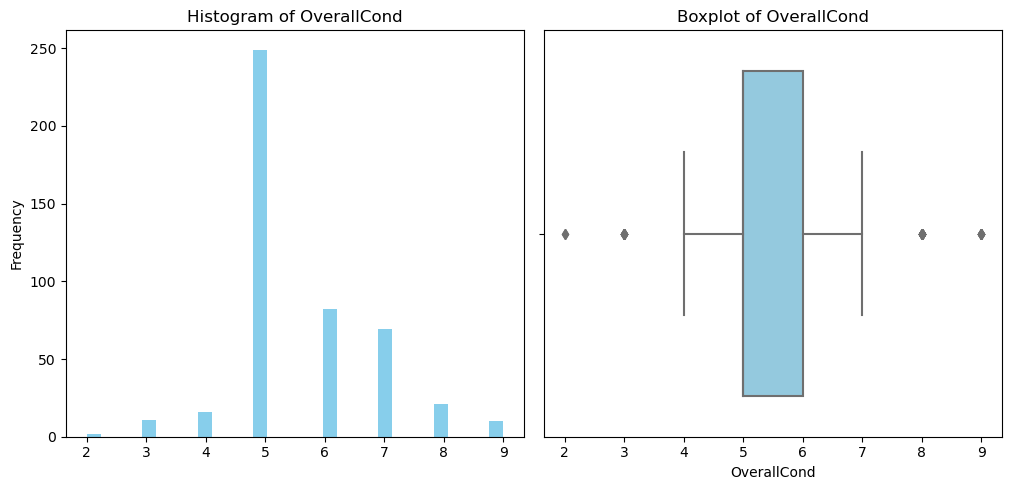

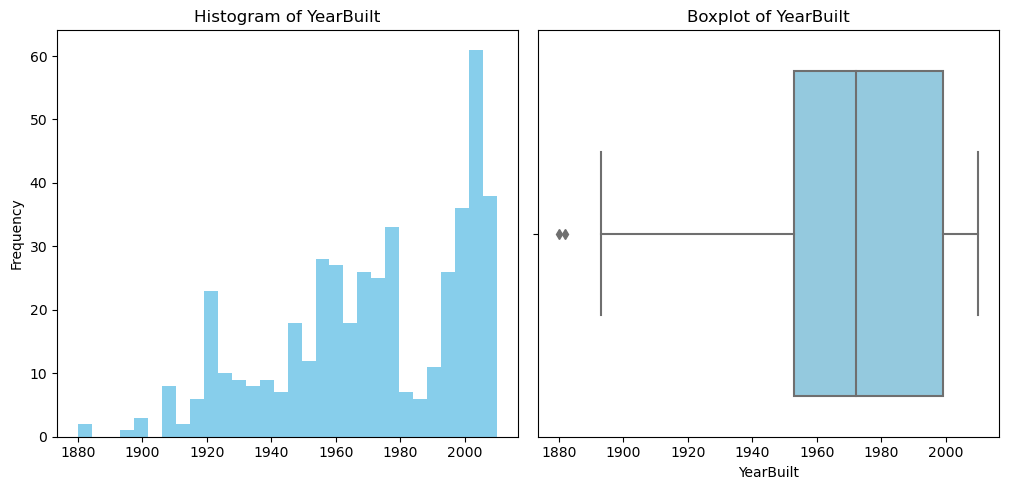

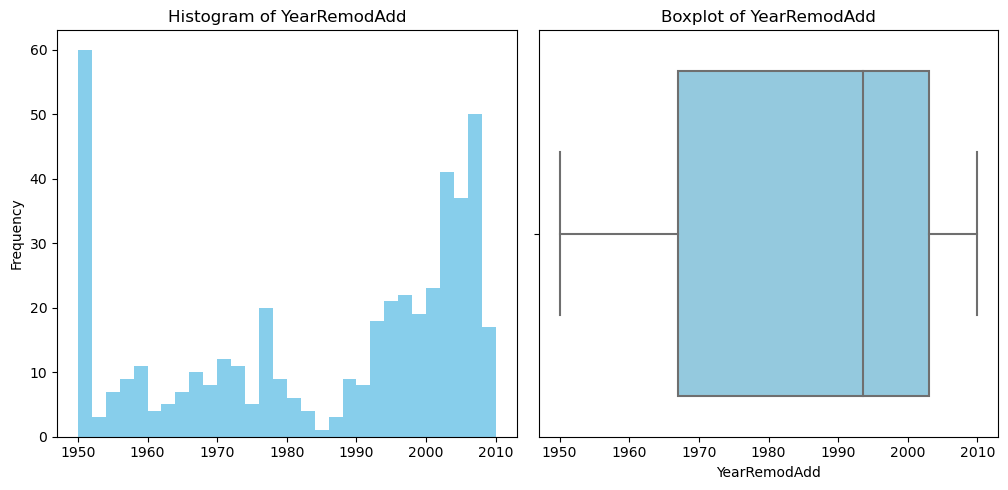

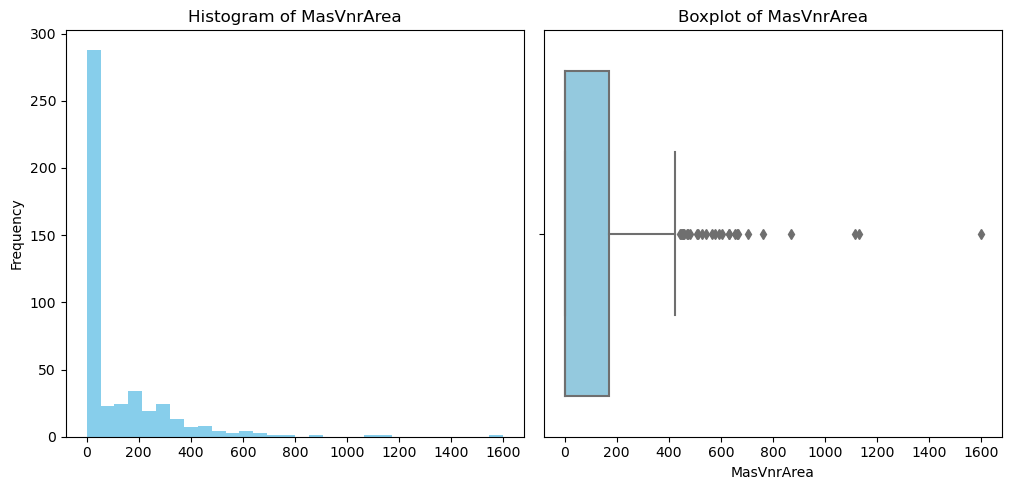

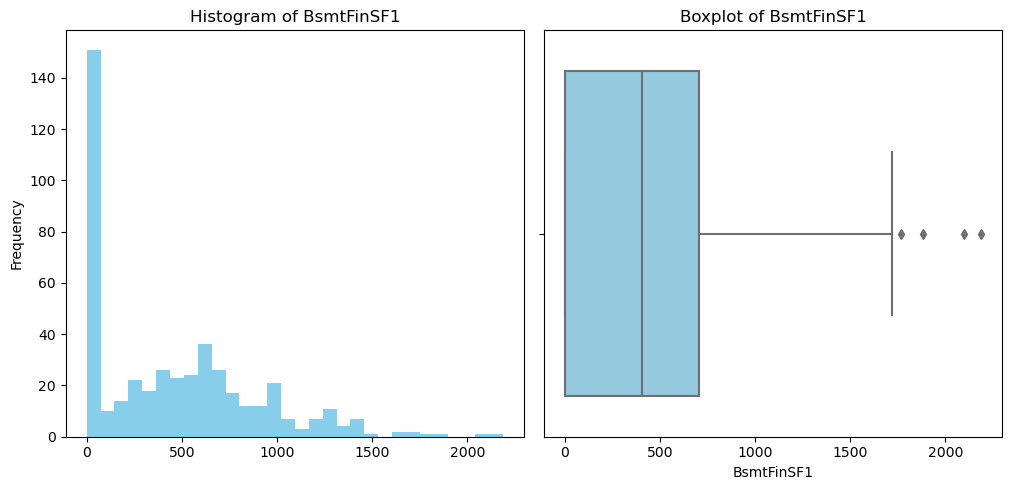

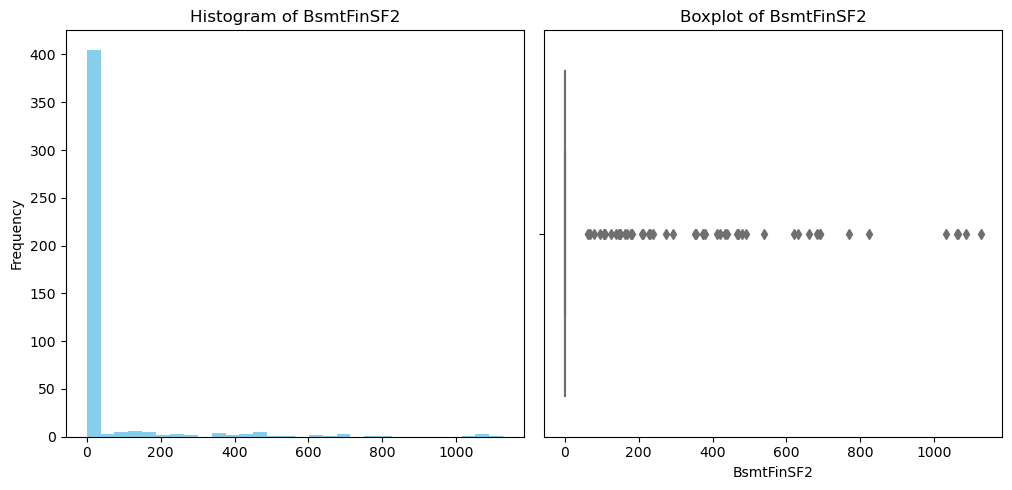

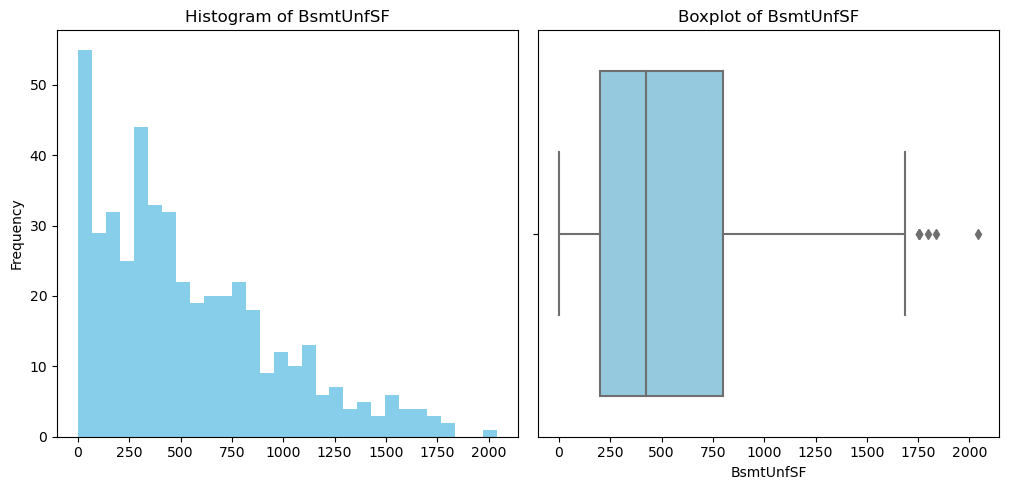

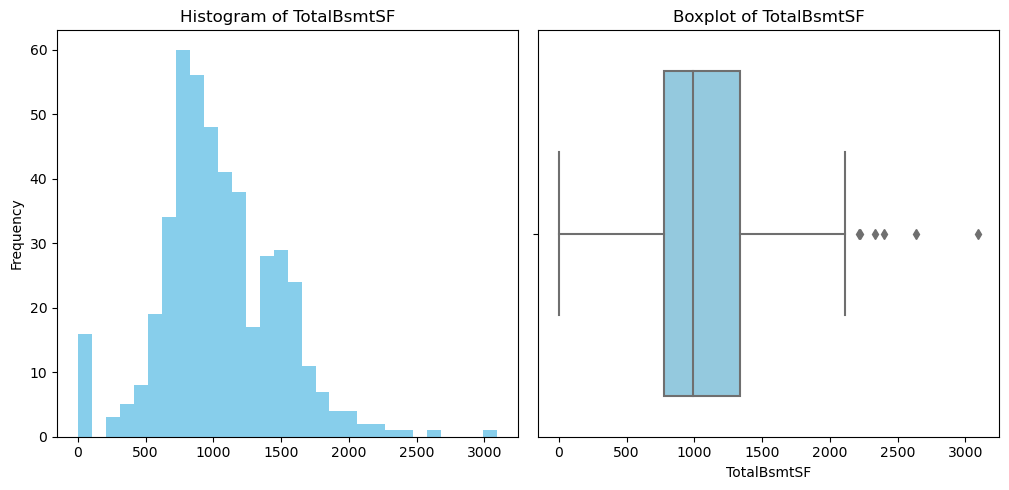

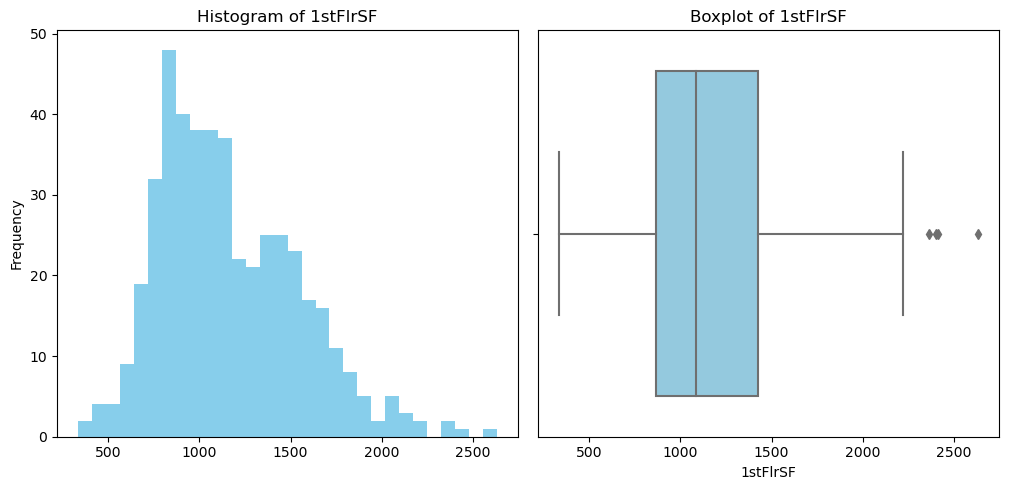

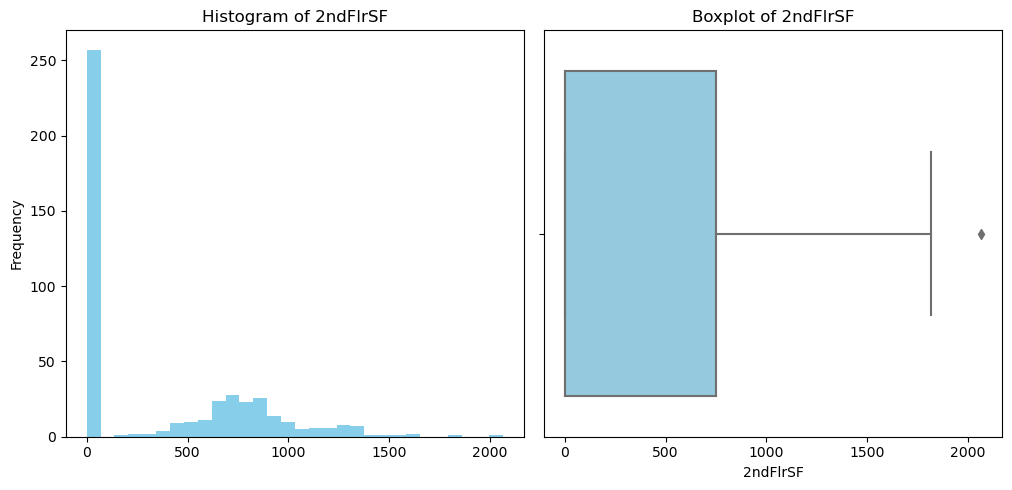

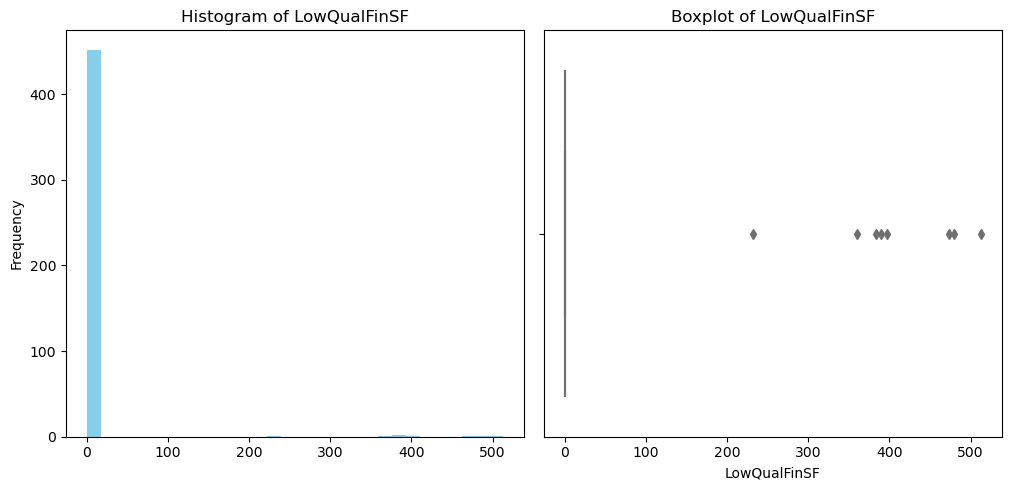

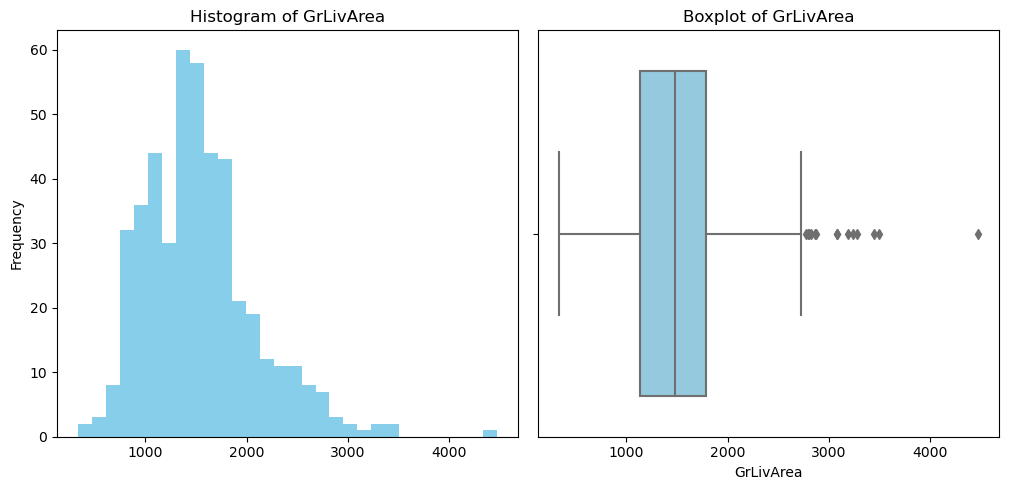

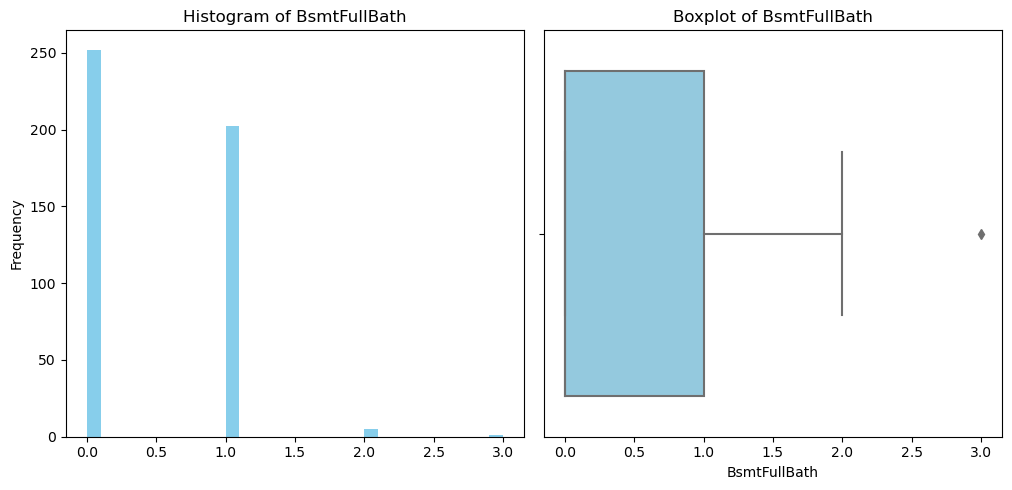

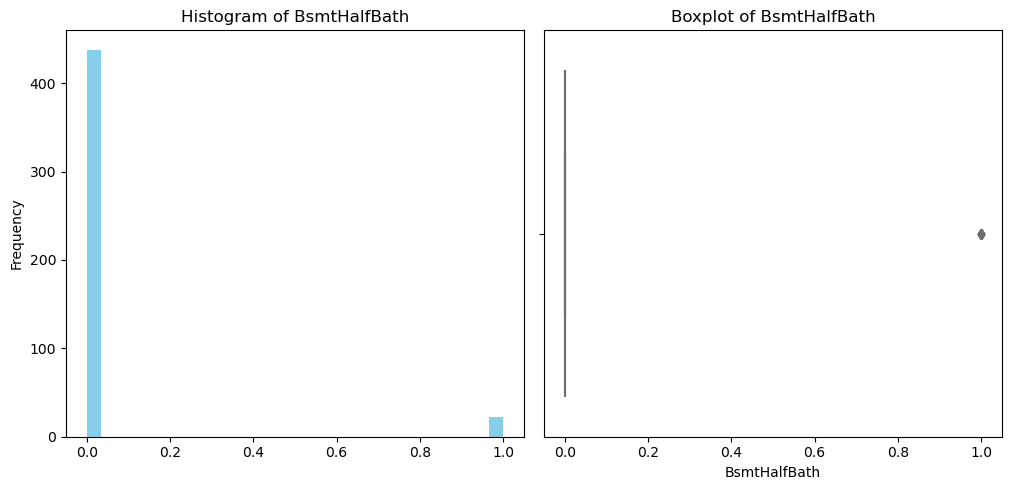

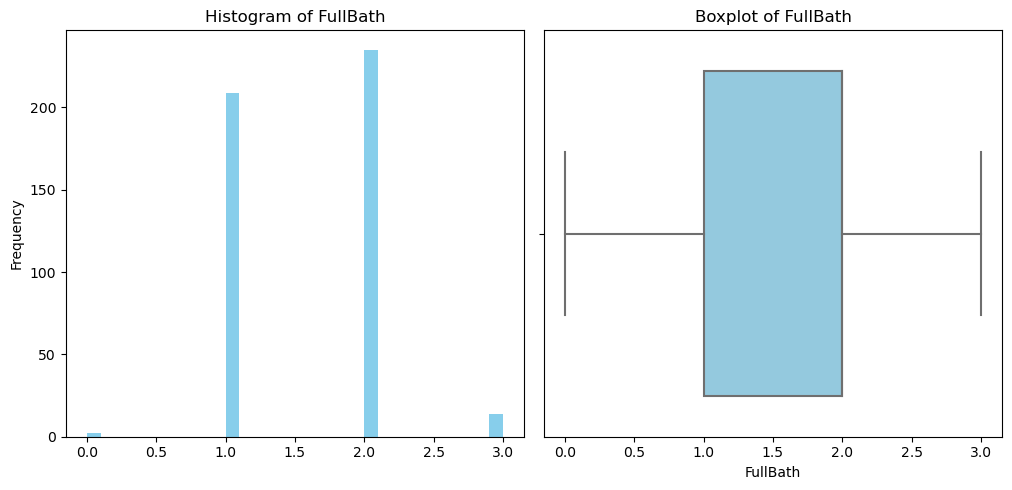

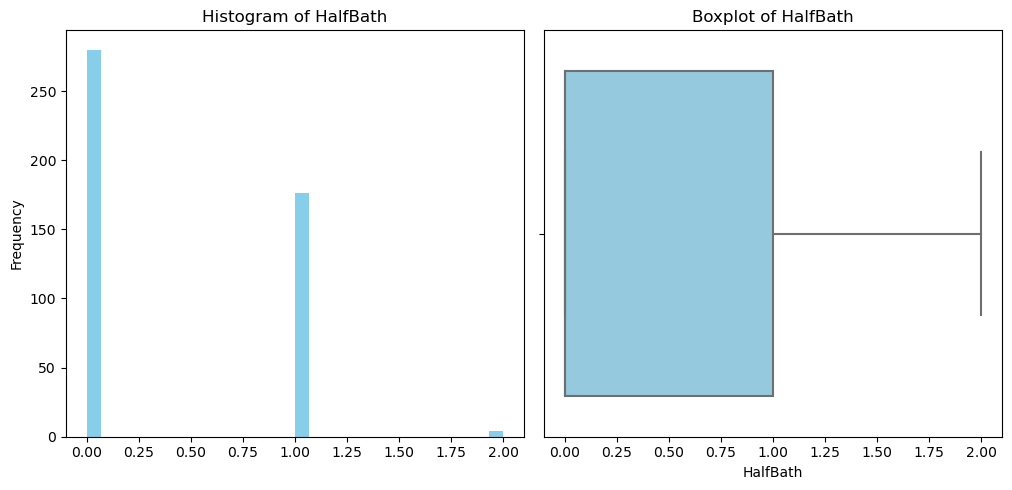

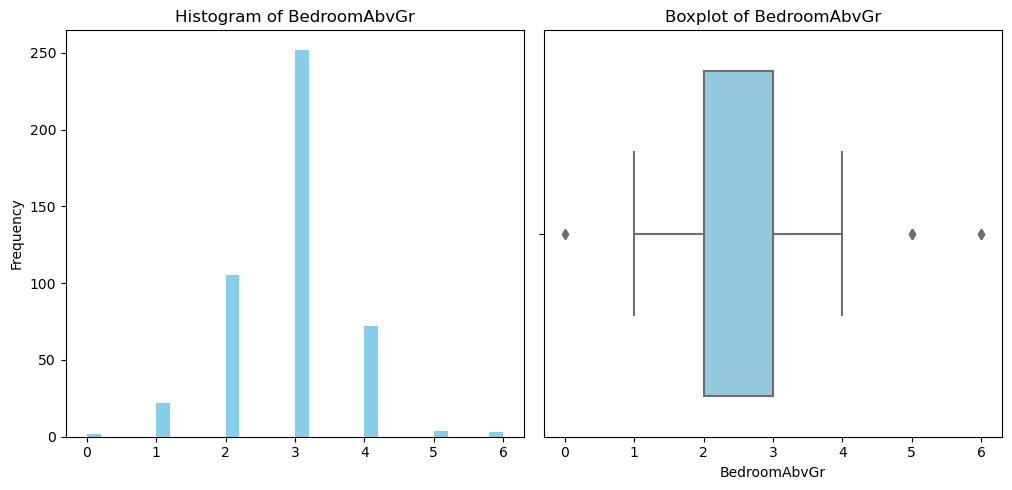

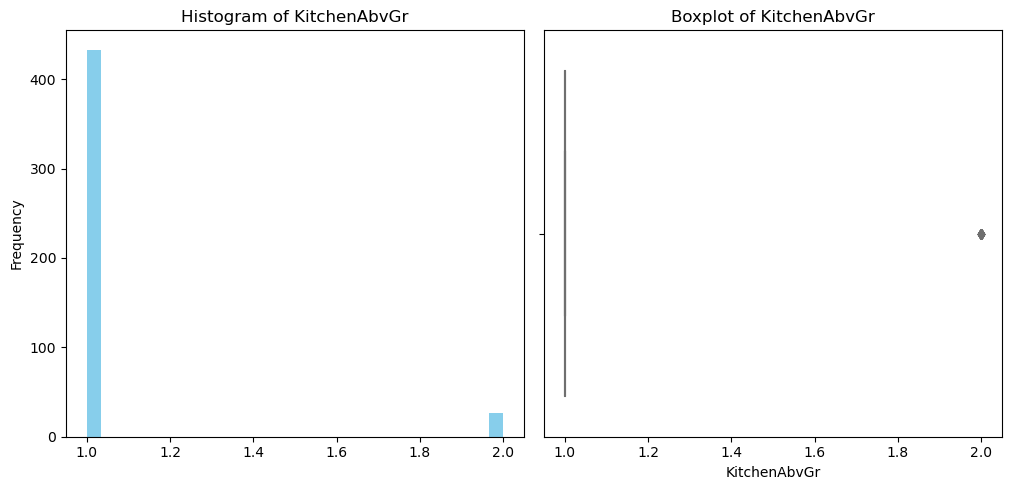

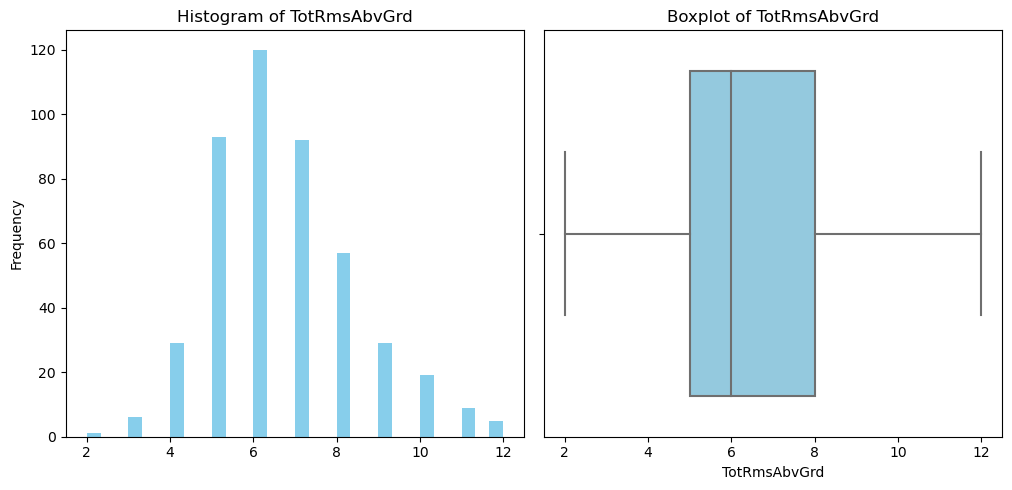

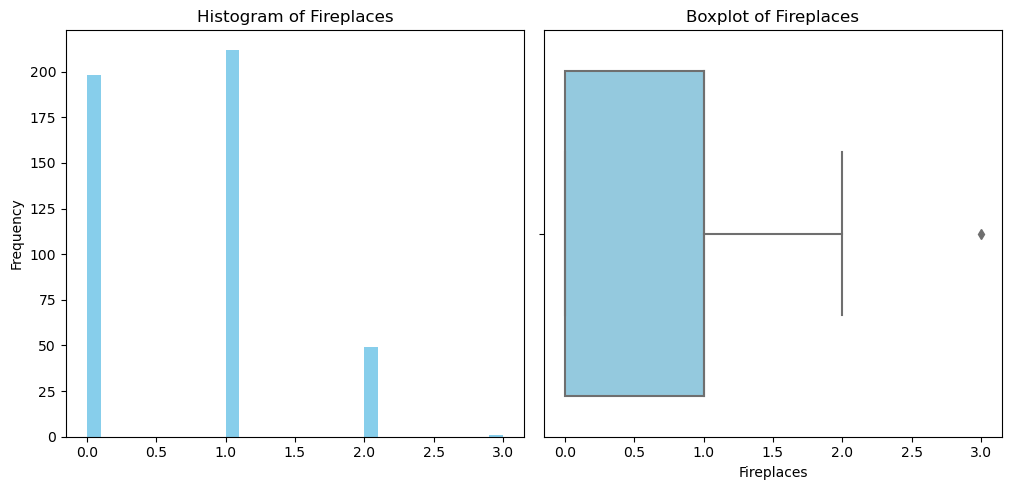

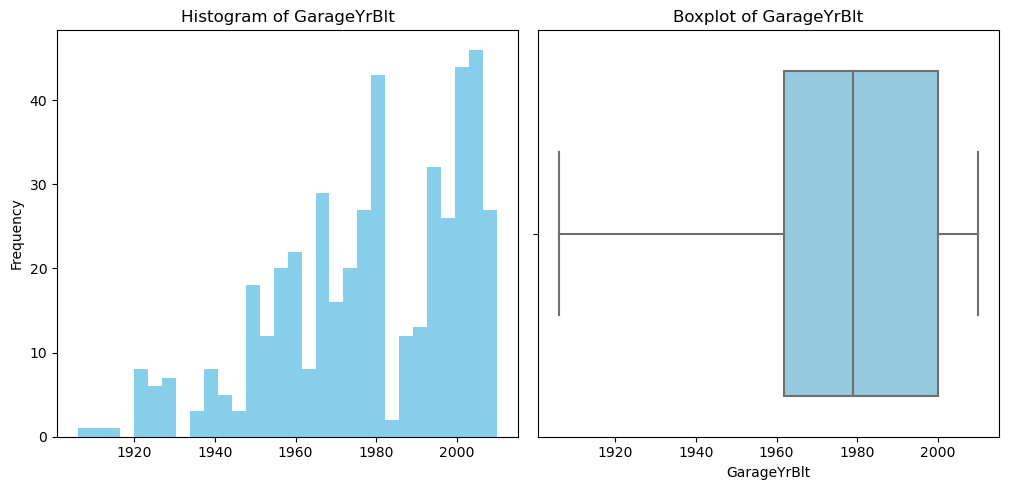

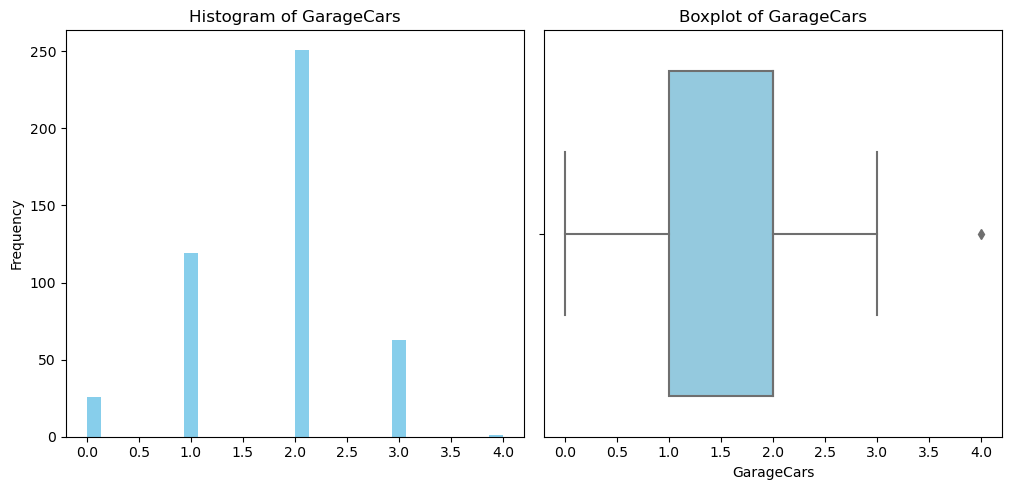

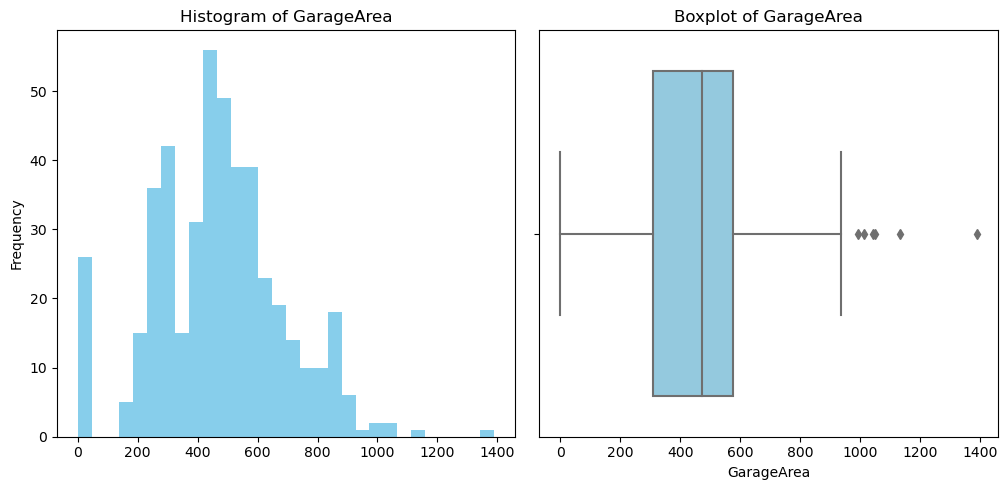

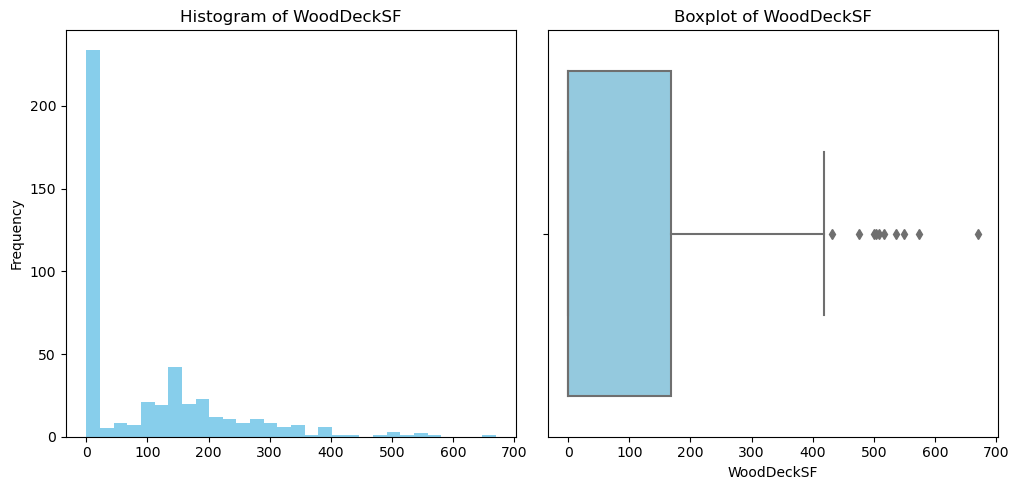

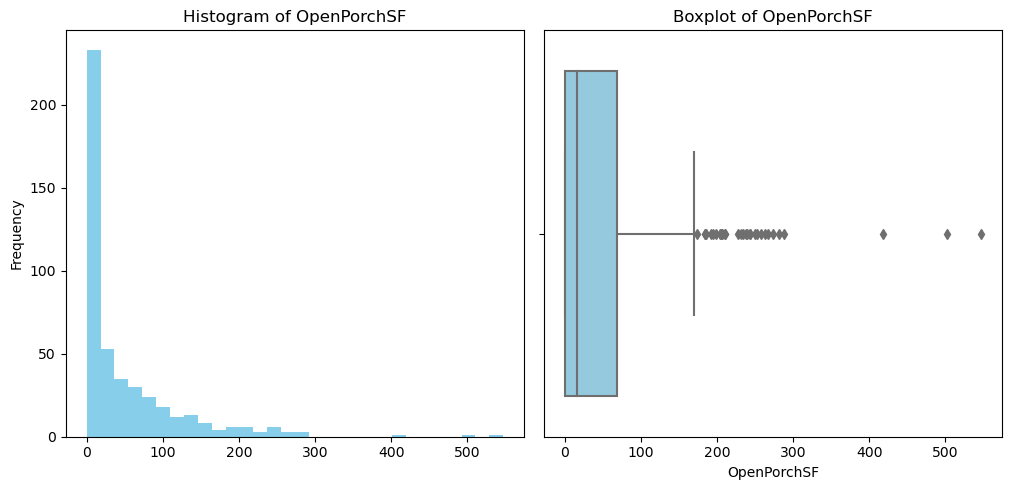

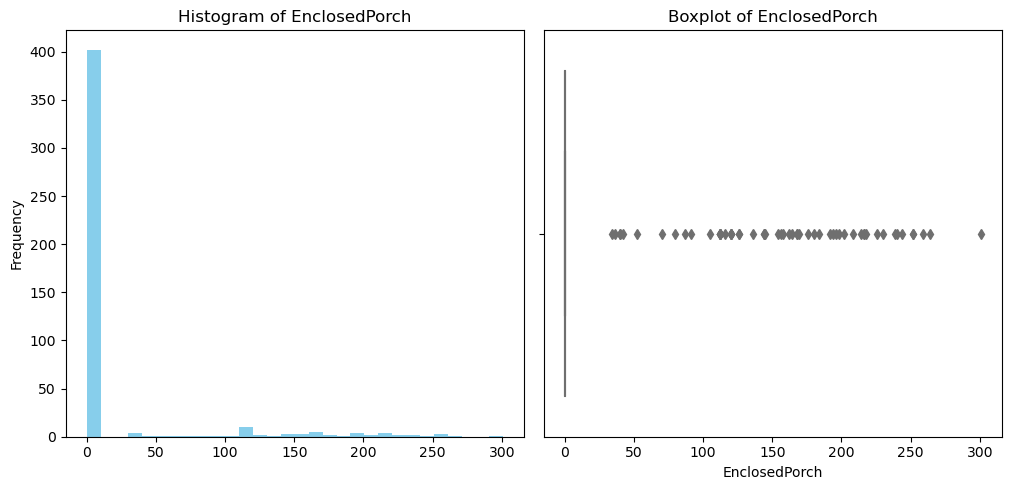

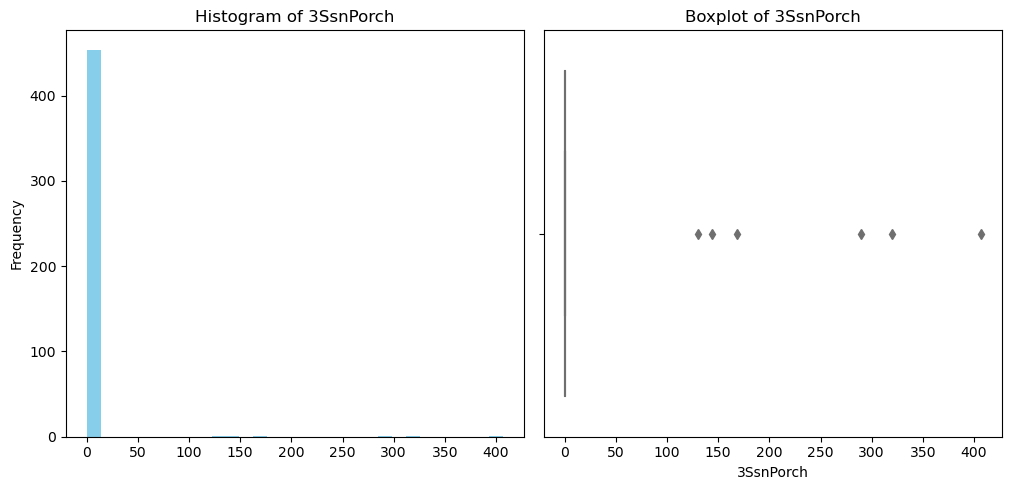

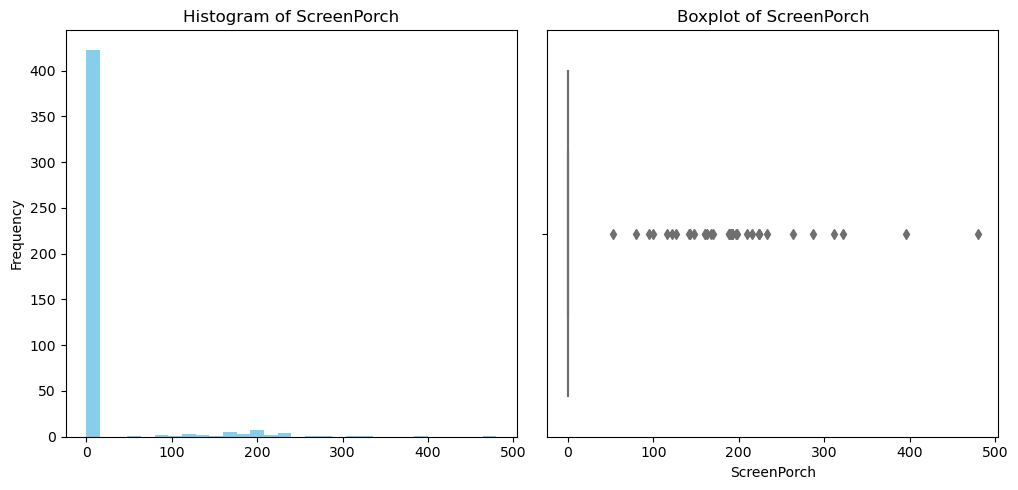

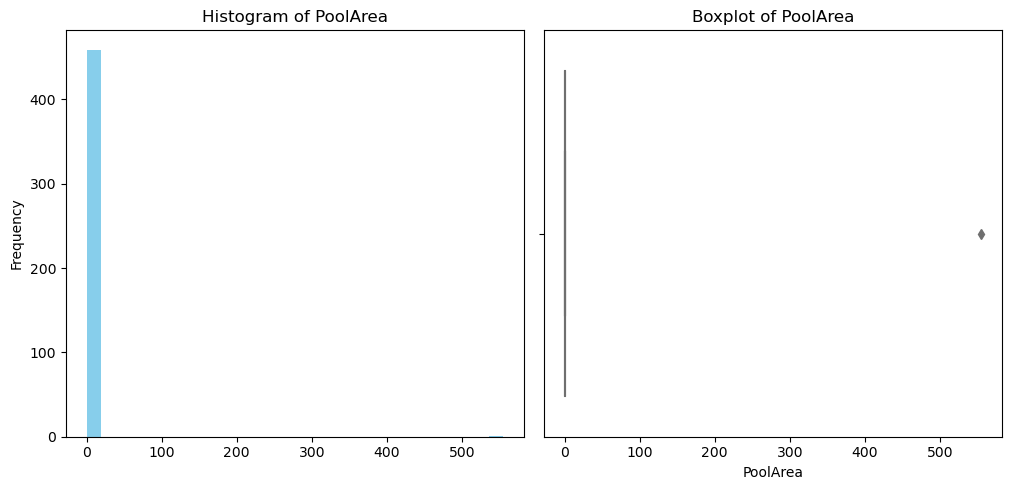

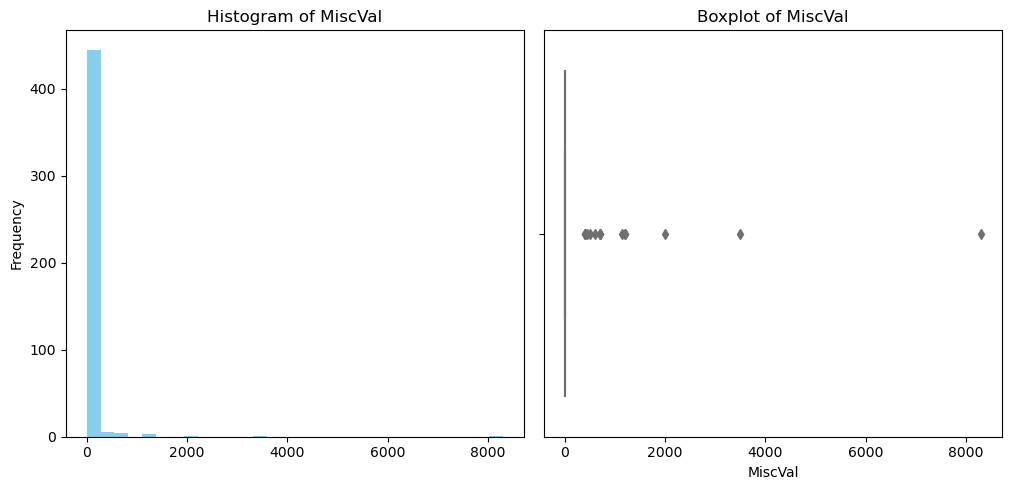

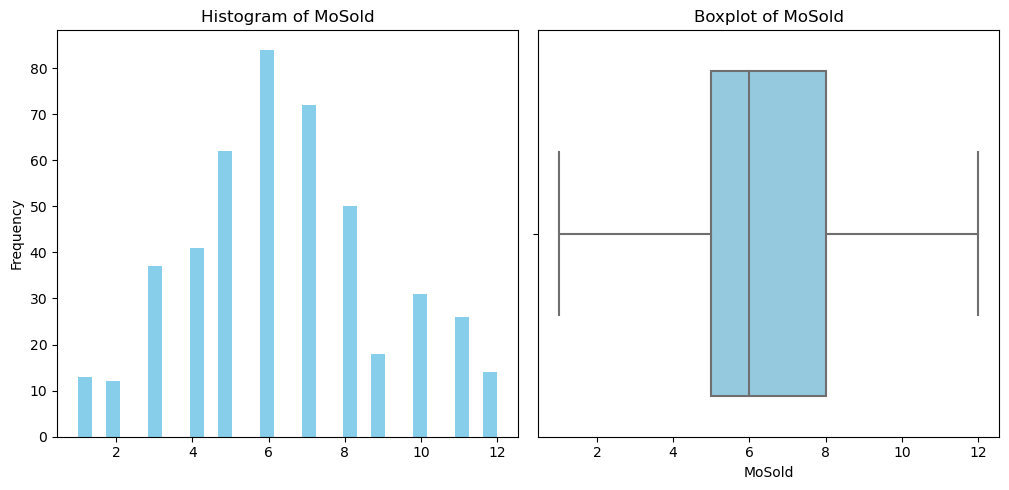

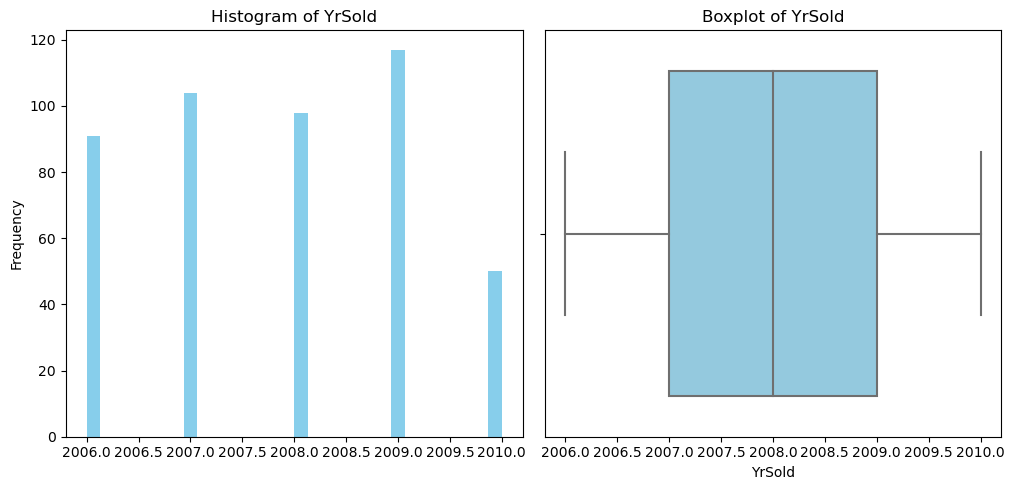

In [188]:
def plot_detect_outliers (columns=numerical_columns):
    for col in numerical_columns:
        plt.figure(figsize=(15, 5))

        # Histogram
        plt.subplot(1, 3, 1)
        X[col].plot.hist(bins=30, color='skyblue')
        plt.title(f'Histogram of {col}')

        # Boxplot
        plt.subplot(1, 3, 2)
        sns.boxplot(x=X[col],color='skyblue')
        plt.title(f'Boxplot of {col}')

        plt.tight_layout()
        plt.show()
        
plot_detect_outliers (numerical_columns)

In [189]:
numerical_columns = X.select_dtypes(include=['number']).columns
numerical_columns

Index(['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond',
       'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2',
       'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces',
       'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal',
       'MoSold', 'YrSold'],
      dtype='object')

In [191]:
# Handle the Skeweness
from scipy.stats import boxcox

def apply_boxcox(df, columns):
    df_transformed = df.copy()
    
    for col in columns:
        # Ensure the data is strictly positive
        if (df[col] > 0).any():
            # Shift the data if there are zero or negative values
            shift = abs(df[col].min()) + 1
            df_transformed[col] = df[col] + shift
        else:
            shift = 0
        
        df_transformed[col], best_lambda = boxcox(df_transformed[col])
        
    return df_transformed

X = apply_boxcox(X,numerical_columns4)
test = apply_boxcox(test,numerical_columns4)

BracketError: The algorithm terminated without finding a valid bracket. Consider trying different initial points.

### <p style="background-color: #EDE7F6; color: #6600ff;margin:0; display:inline-block;padding:.6rem;border-radius:.25rem;">C3.Detect Outliers</p>

In [232]:
def calculate_outliers_percentage(df):

    outlier_counts = {}

    for column in df.select_dtypes(include=['number']).columns:
        Q1 = df[column].quantile(0.25)
        Q3 = df[column].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR

        # Calculate outliers
        outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)]
        outlier_counts[column] = len(outliers)

    # Print the percentage of outliers for each column
    for column in outlier_counts:
        percentage = (outlier_counts[column] / len(df)) * 100
        print(f"Percentage of outliers in {column}: {percentage:.2f}%")

print("Train data:")
calculate_outliers_percentage(X)
print("Test data:")
calculate_outliers_percentage(test)

Train data:
Percentage of outliers in MSSubClass: 7.05%
Percentage of outliers in LotFrontage: 7.26%
Percentage of outliers in LotArea: 4.73%
Percentage of outliers in OverallQual: 0.14%
Percentage of outliers in OverallCond: 8.56%
Percentage of outliers in YearBuilt: 0.48%
Percentage of outliers in YearRemodAdd: 0.00%
Percentage of outliers in MasVnrArea: 6.71%
Percentage of outliers in BsmtFinSF1: 0.48%
Percentage of outliers in BsmtFinSF2: 11.44%
Percentage of outliers in BsmtUnfSF: 1.99%
Percentage of outliers in TotalBsmtSF: 4.18%
Percentage of outliers in 1stFlrSF: 1.37%
Percentage of outliers in 2ndFlrSF: 0.14%
Percentage of outliers in LowQualFinSF: 1.78%
Percentage of outliers in GrLivArea: 2.12%
Percentage of outliers in BsmtFullBath: 0.07%
Percentage of outliers in BsmtHalfBath: 5.62%
Percentage of outliers in FullBath: 0.00%
Percentage of outliers in HalfBath: 0.00%
Percentage of outliers in BedroomAbvGr: 2.40%
Percentage of outliers in KitchenAbvGr: 4.66%
Percentage of out

In [233]:
def handle_outliers(df):

    for column in df.select_dtypes(include=['number']).columns:
        Q1 = df[column].quantile(0.25)
        Q3 = df[column].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        
        df[column] = df[column].clip(lower=lower_bound, upper=upper_bound)
    #clip: everything smaller than lower_bound = lower_bound / everything grater than upper_bound = upper_bound
    return df

X = handle_outliers(X)
test = handle_outliers(test)

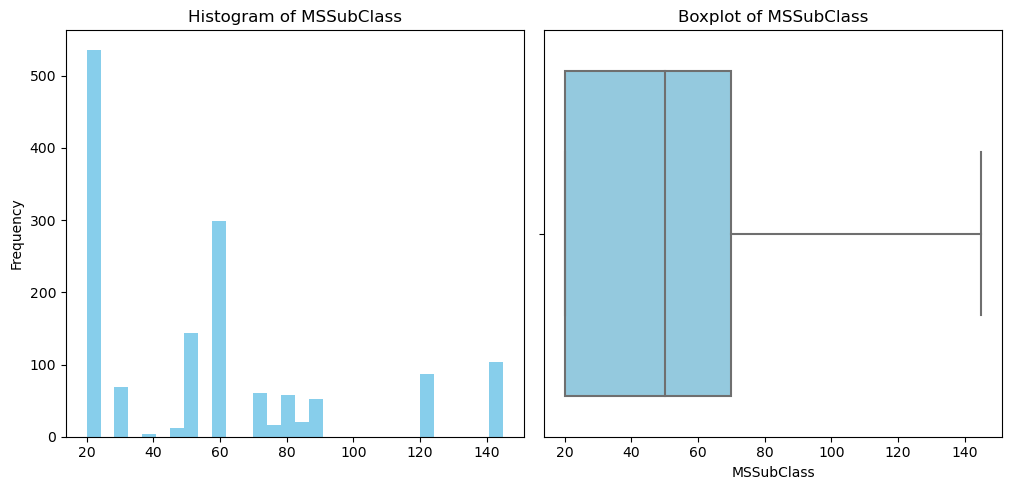

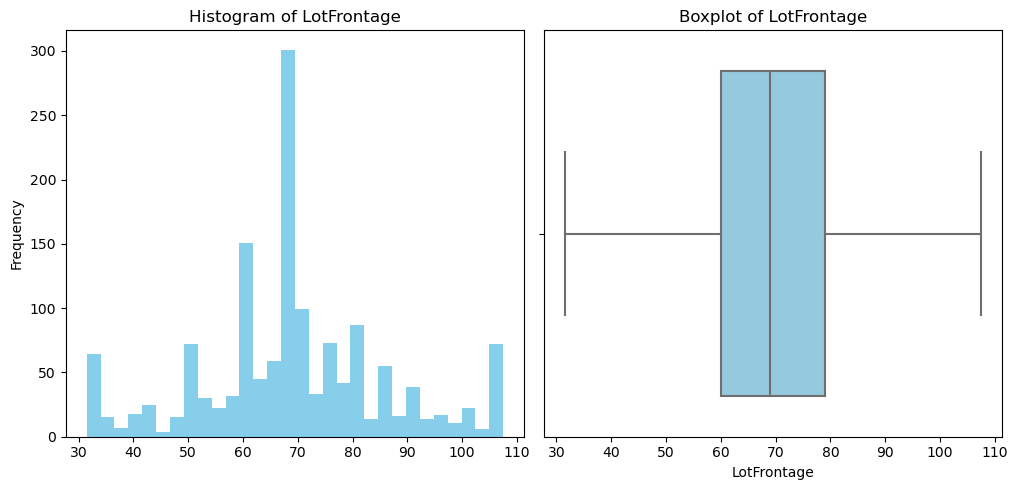

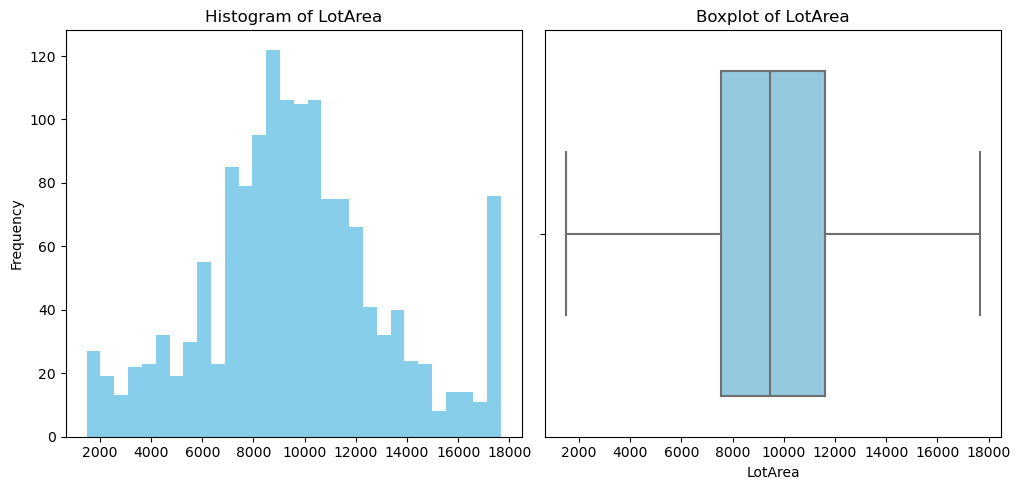

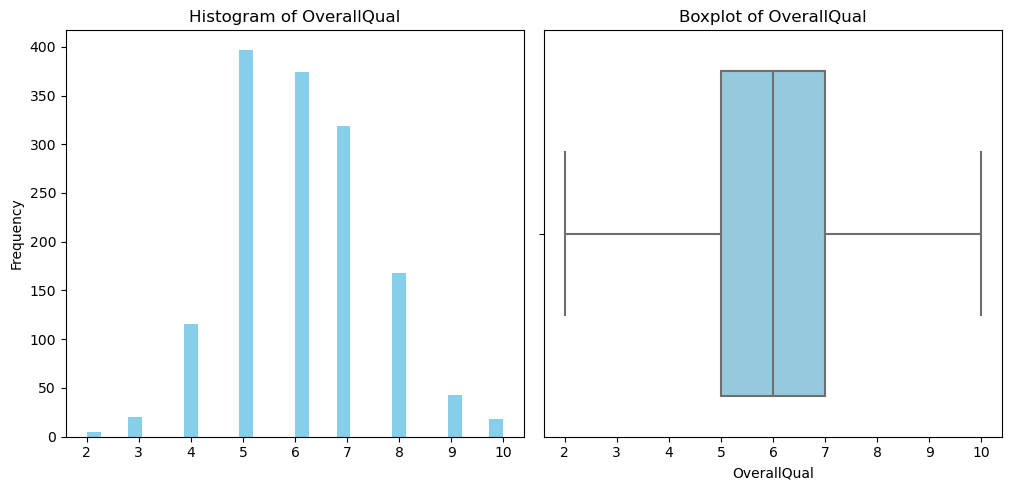

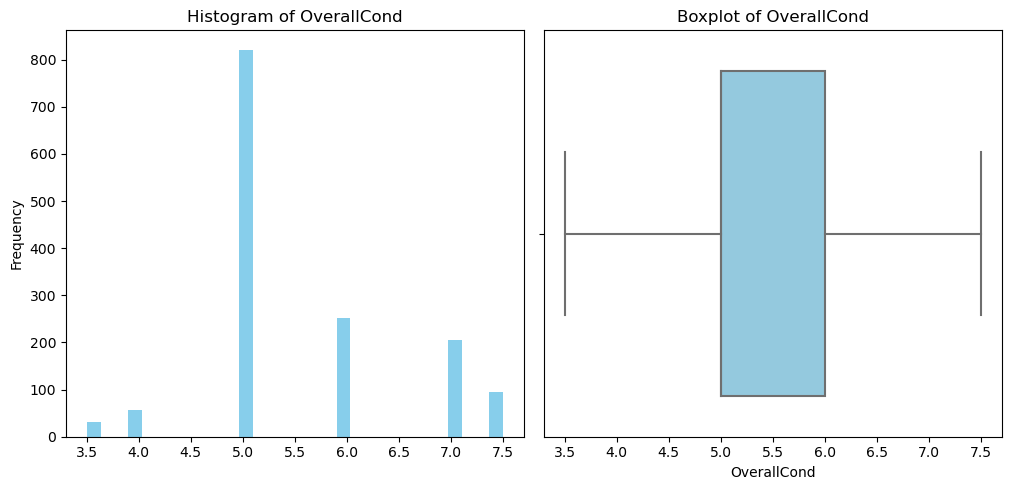

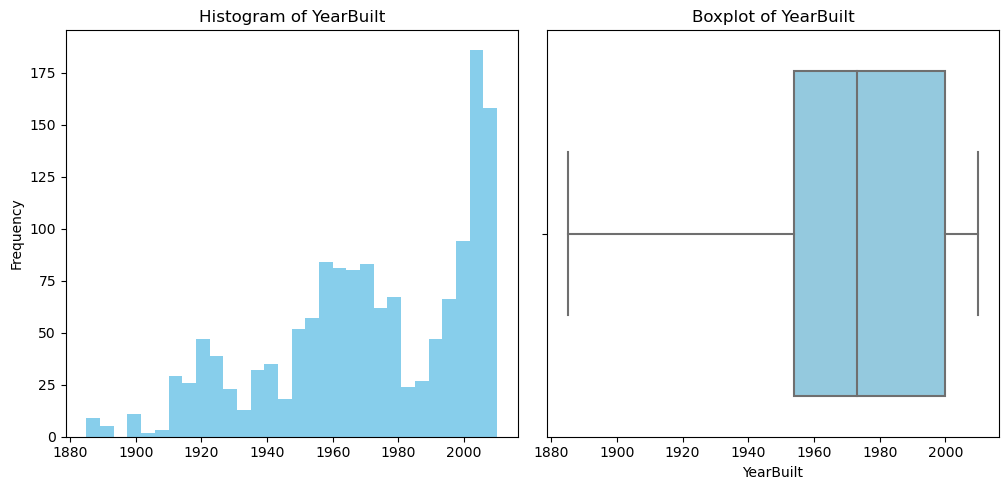

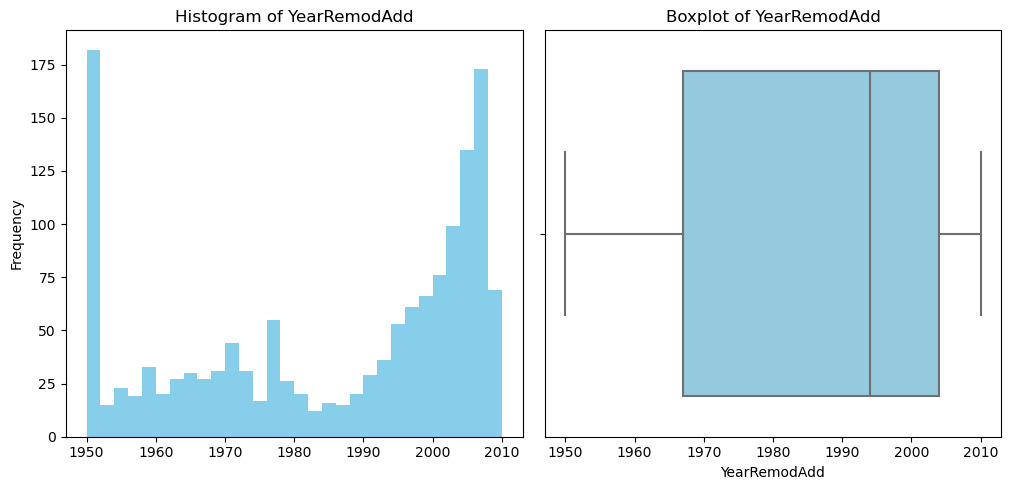

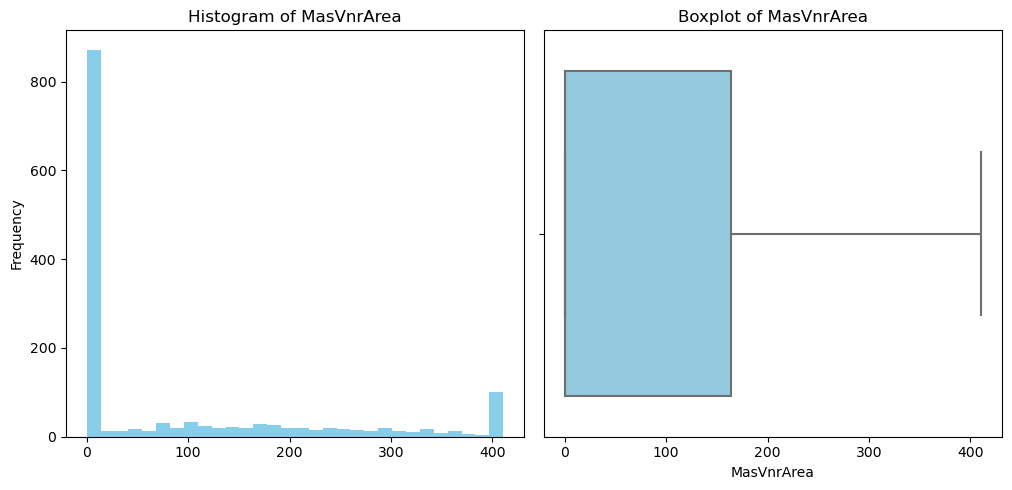

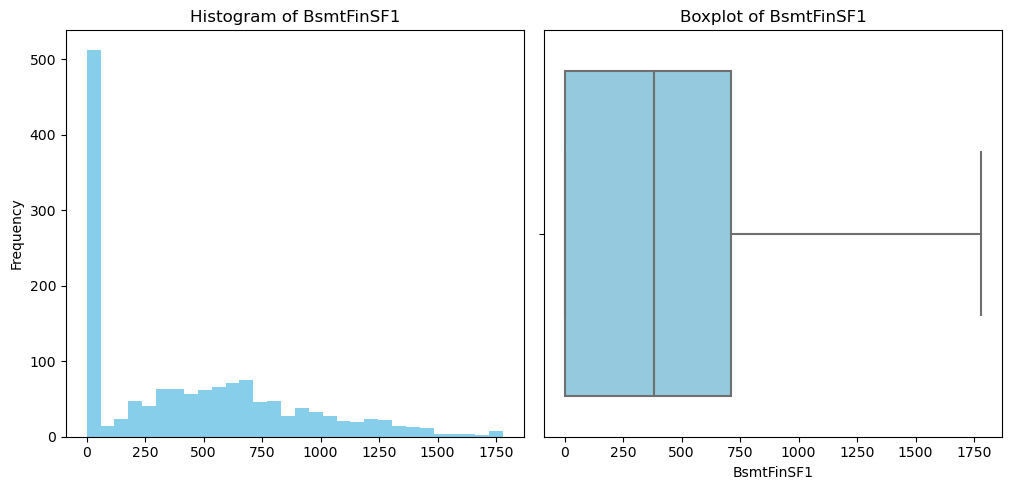

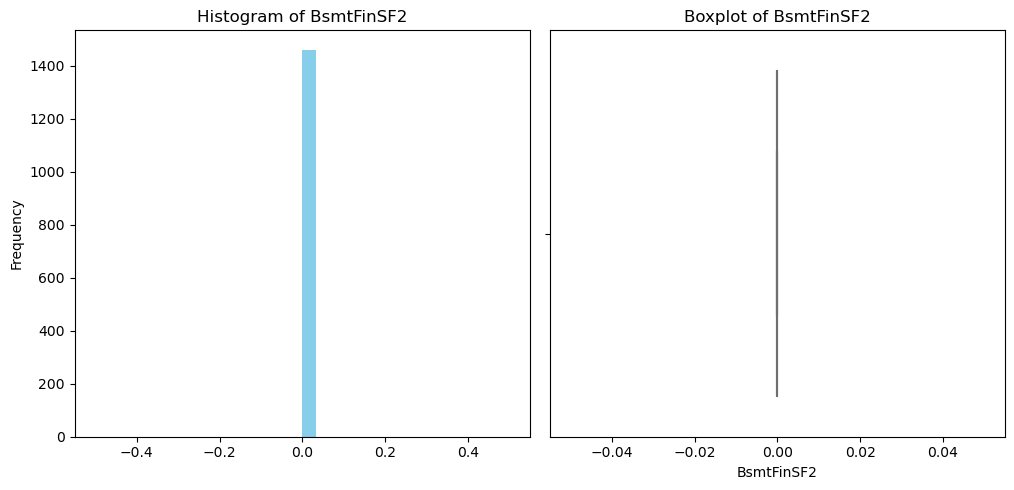

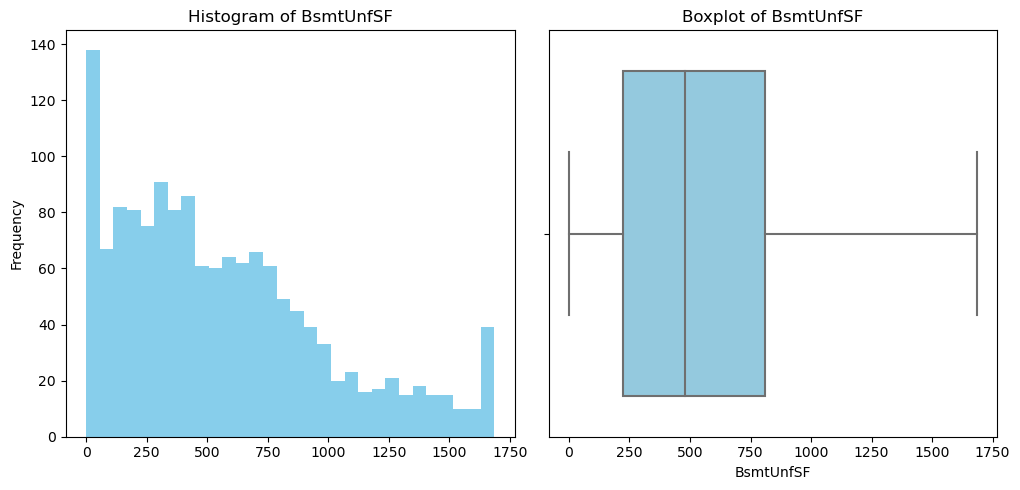

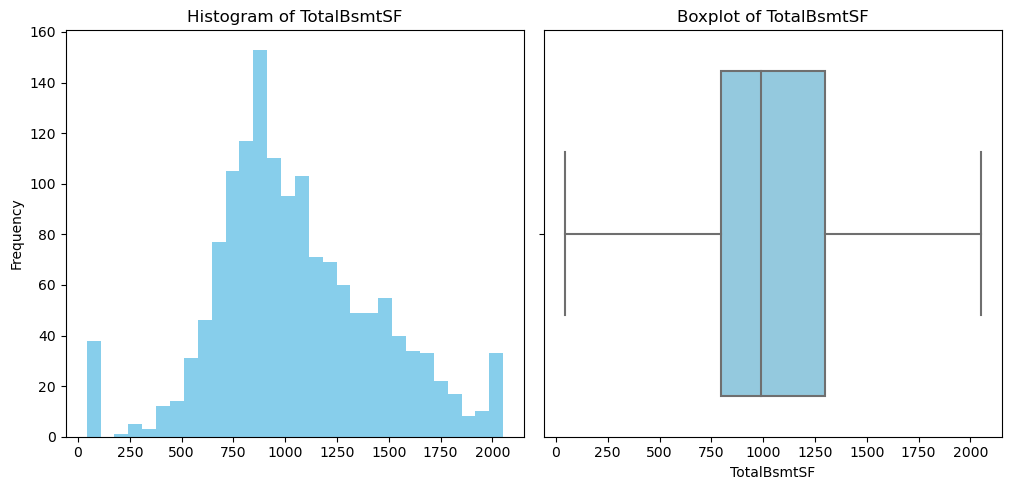

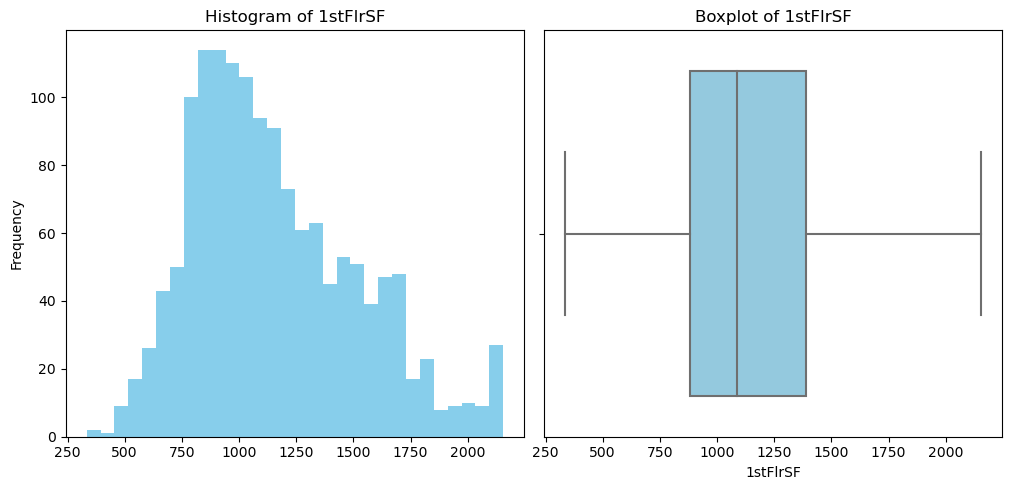

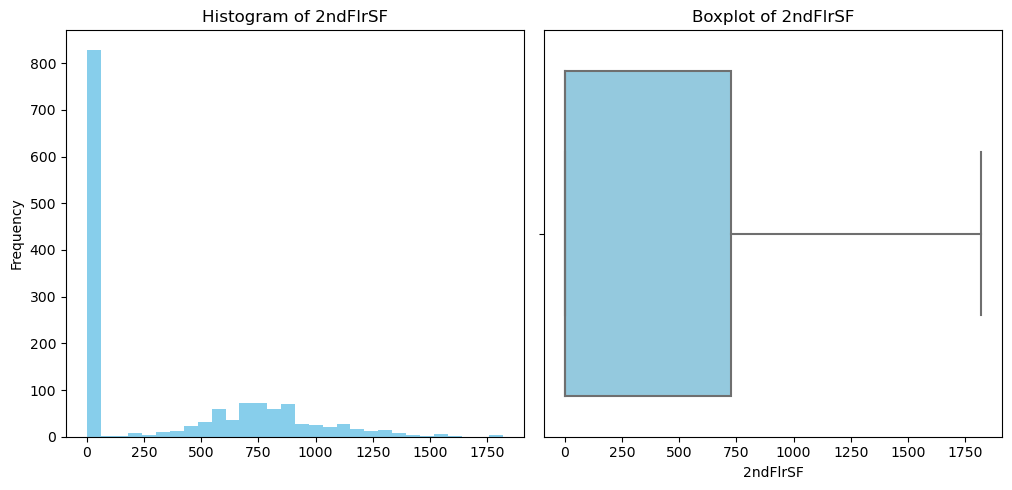

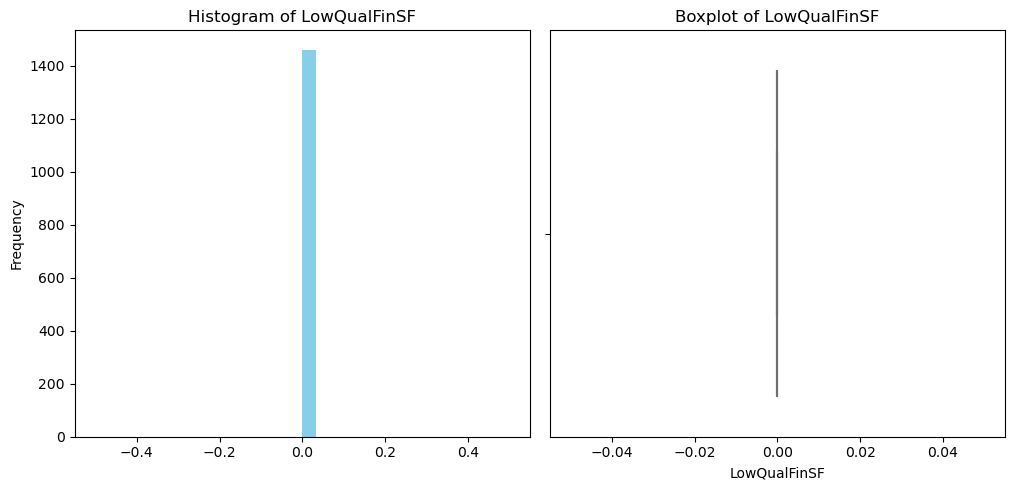

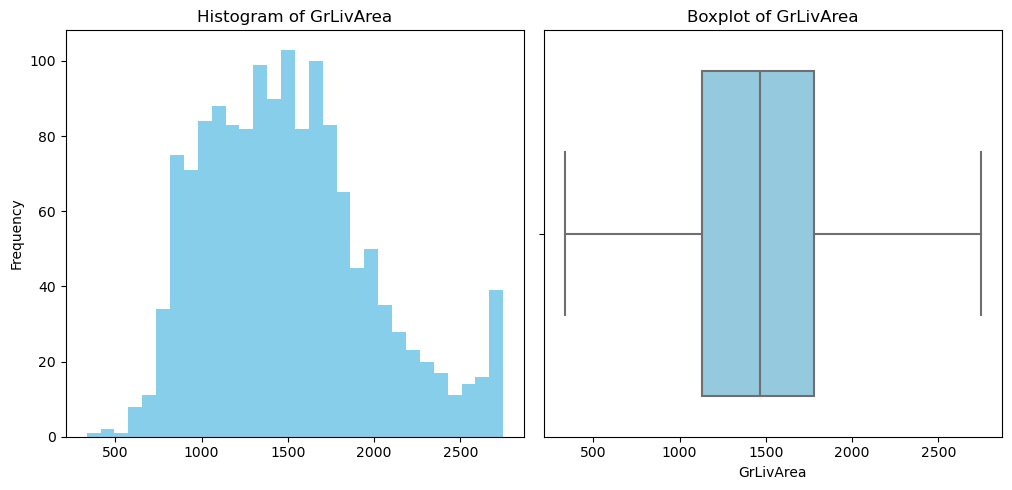

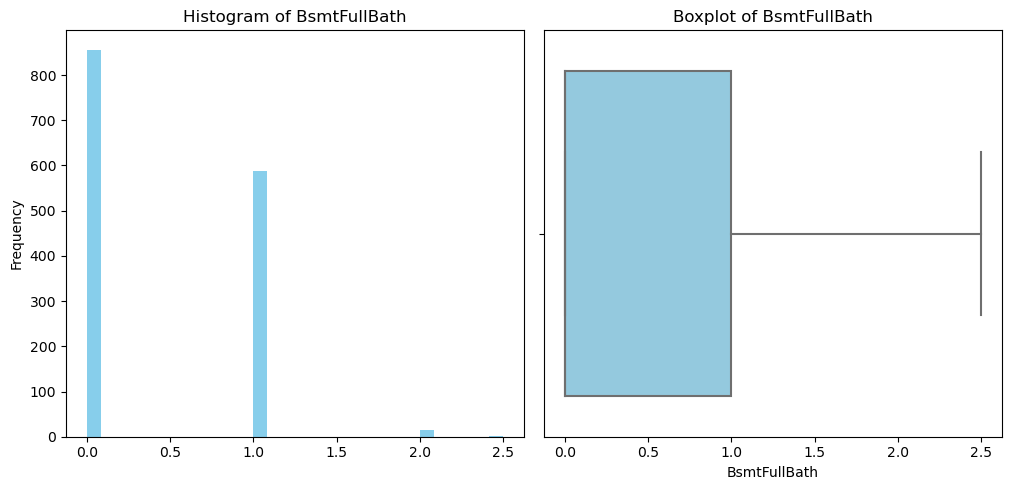

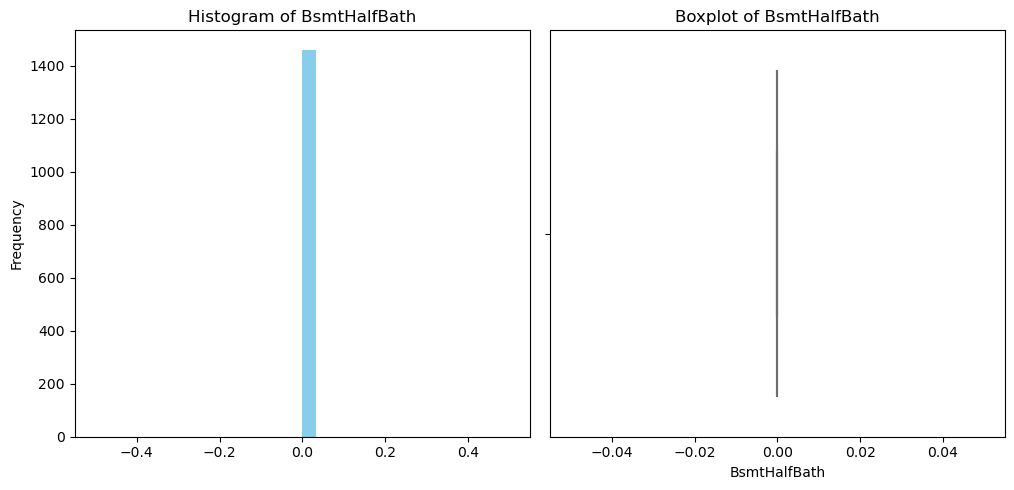

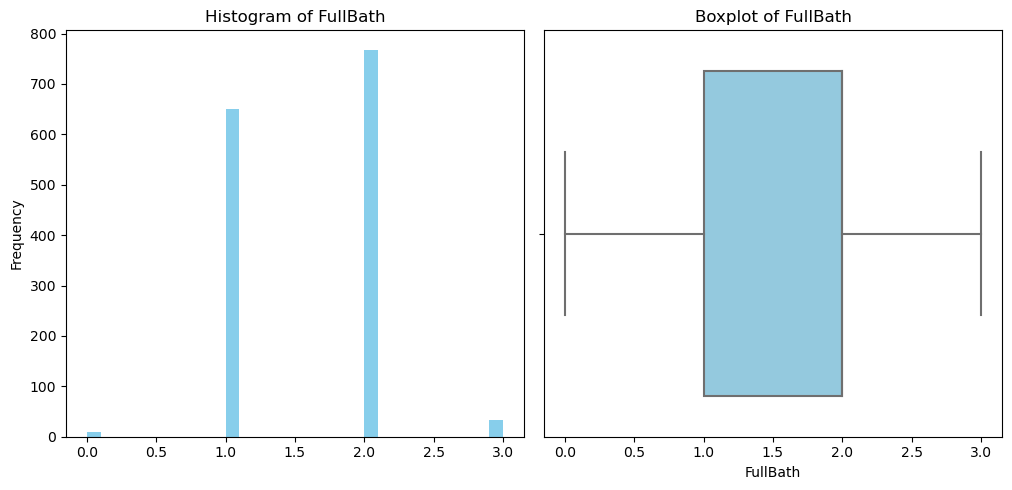

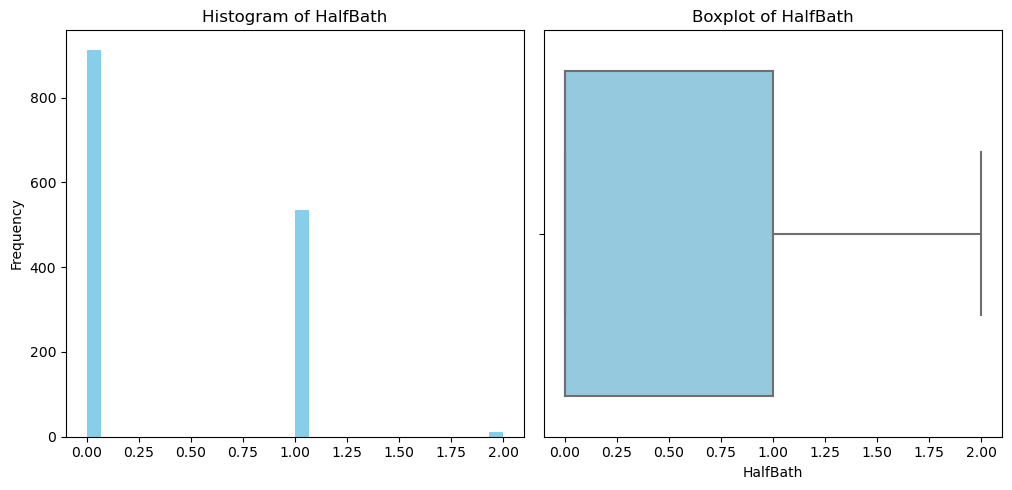

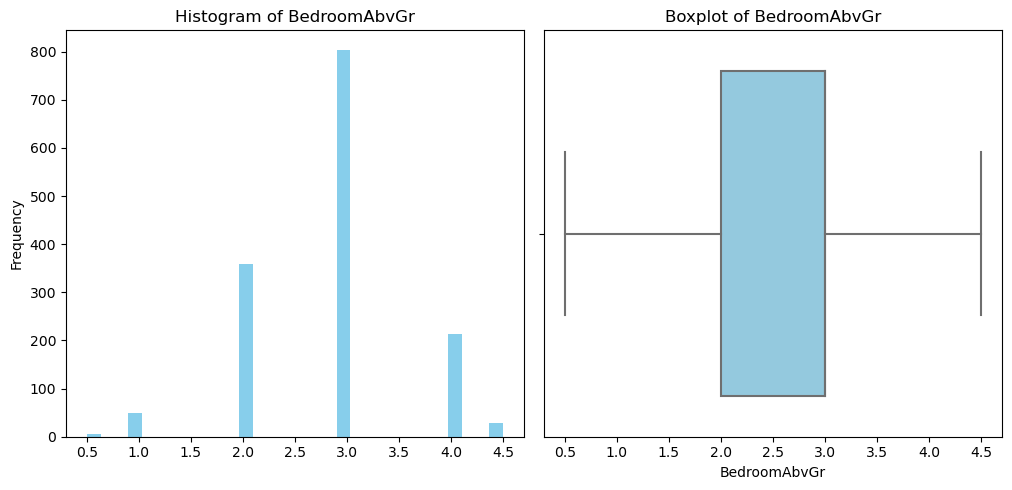

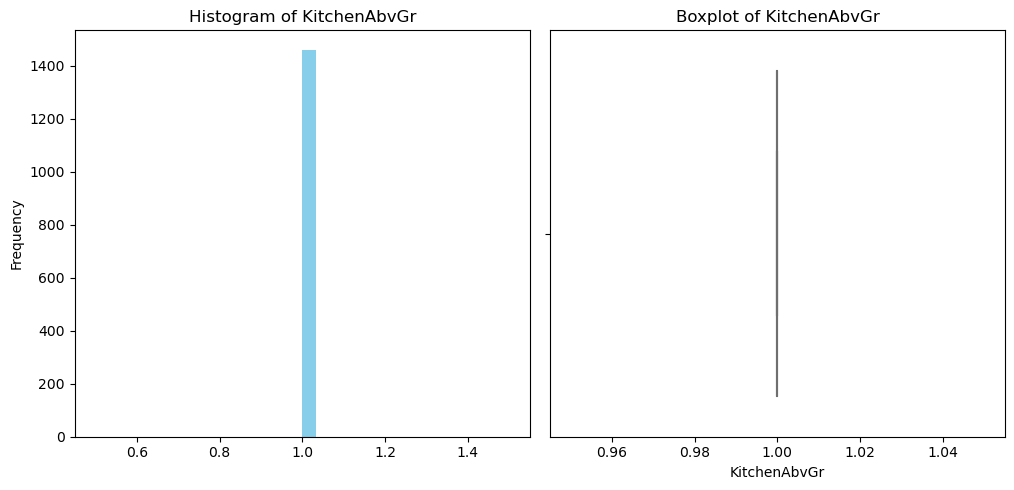

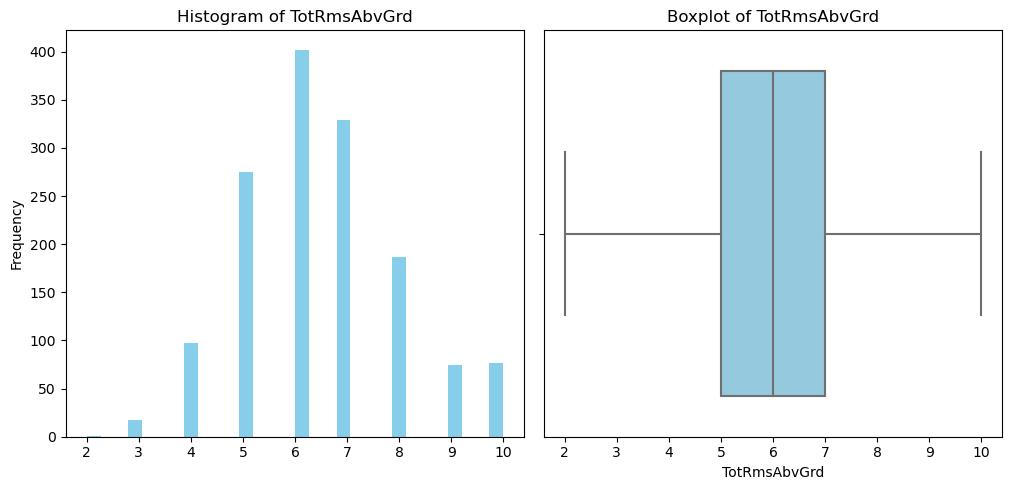

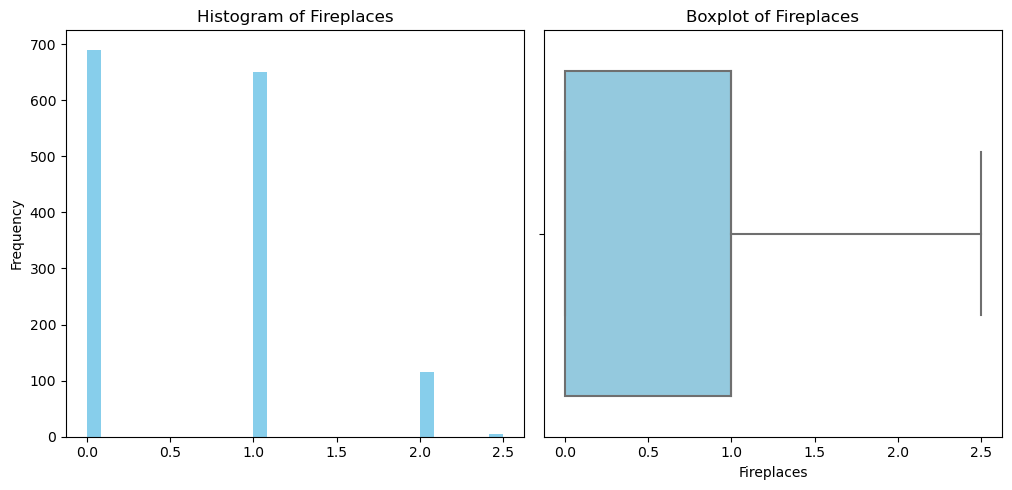

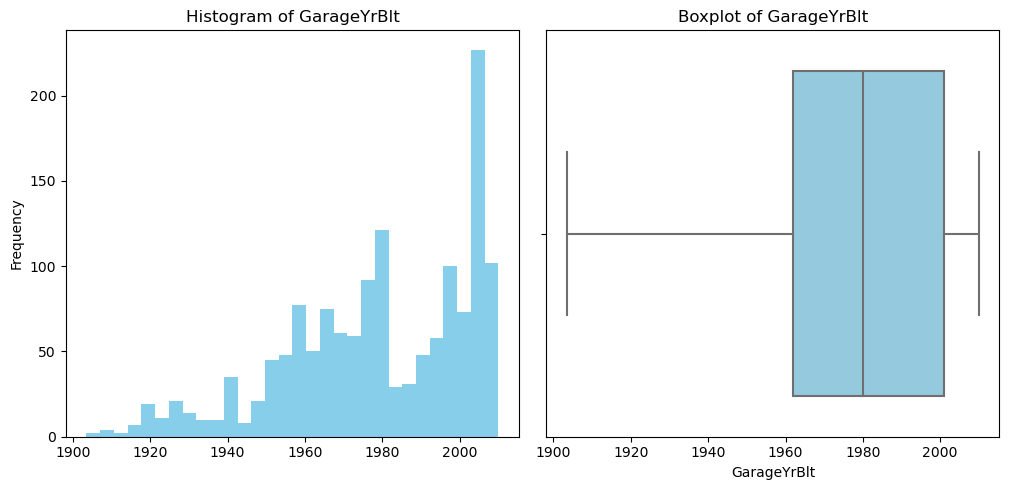

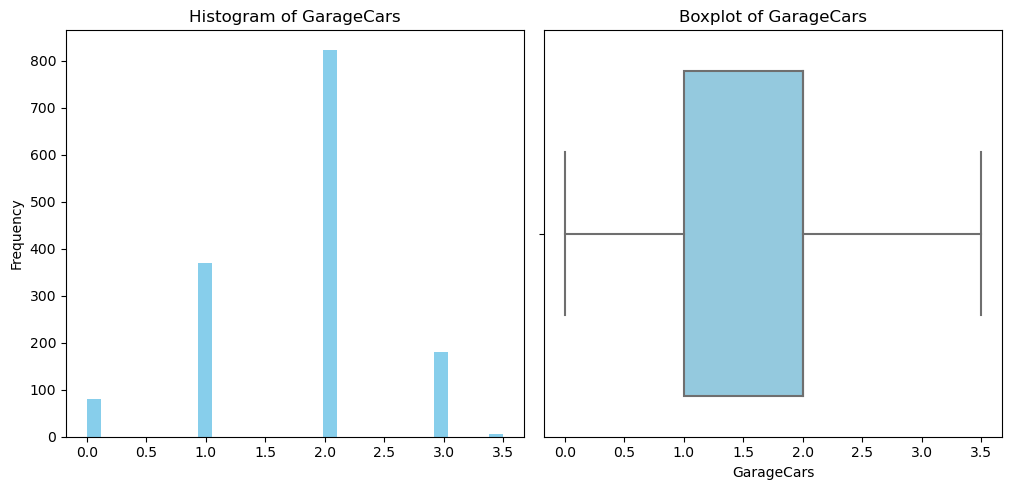

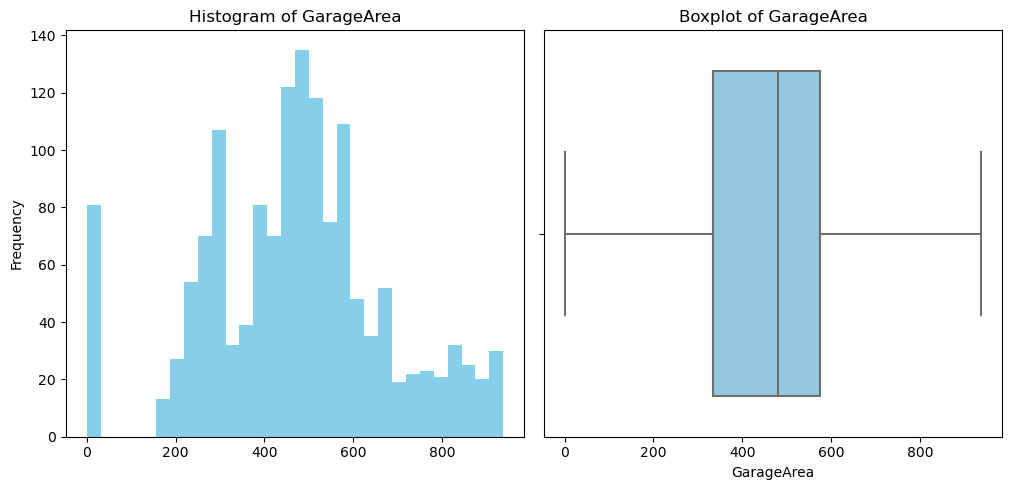

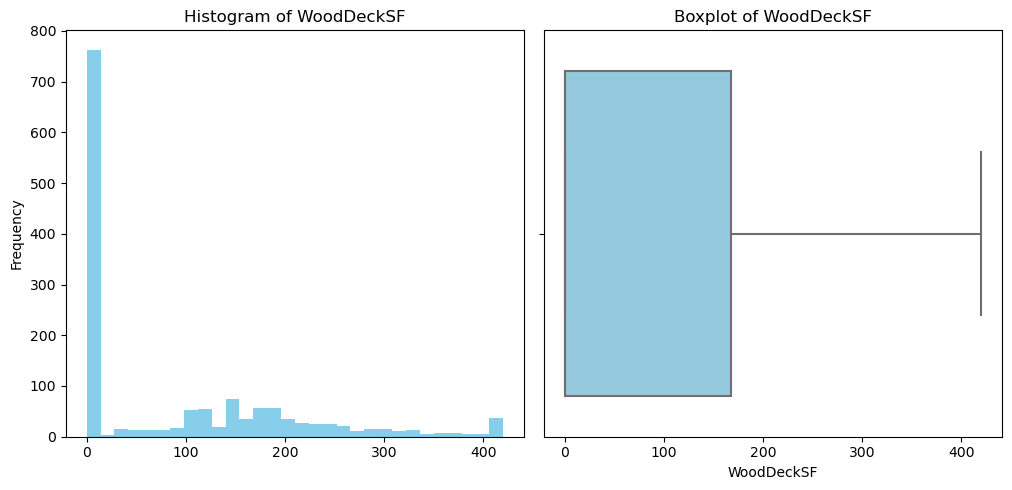

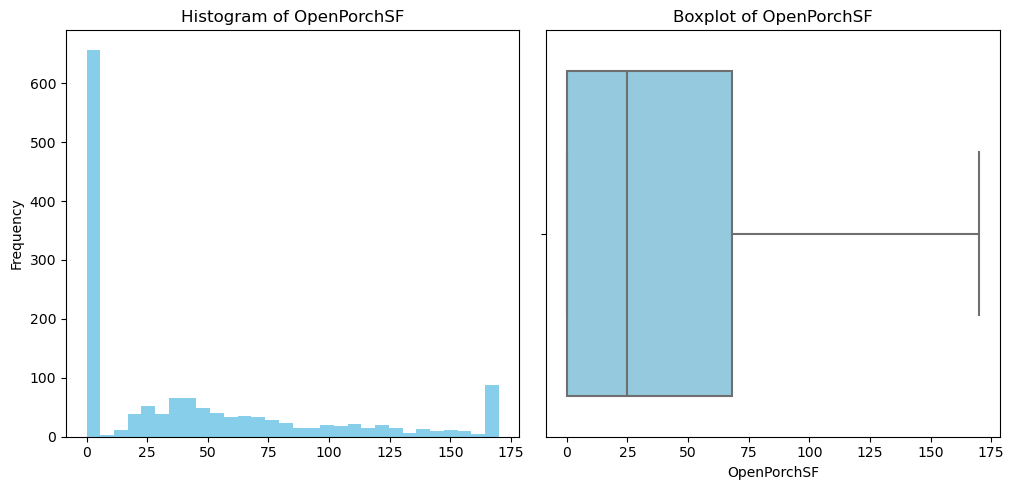

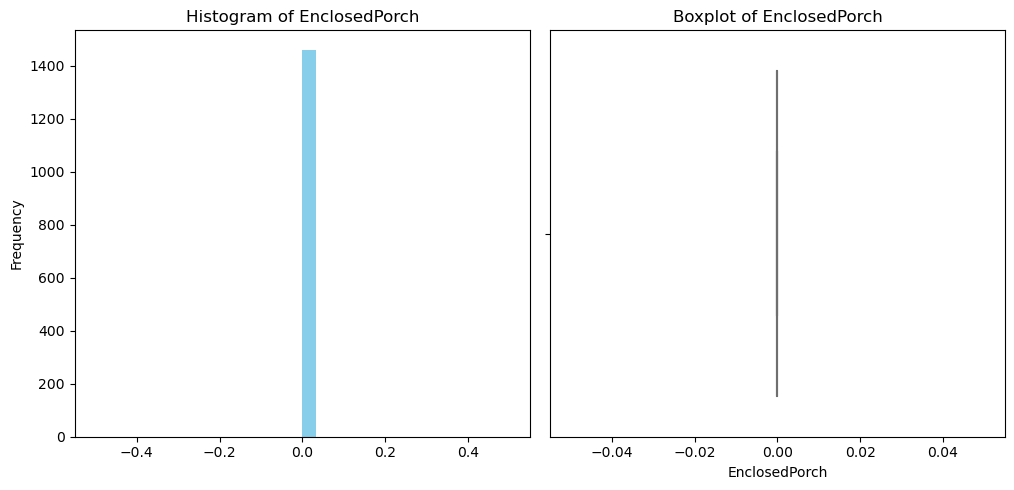

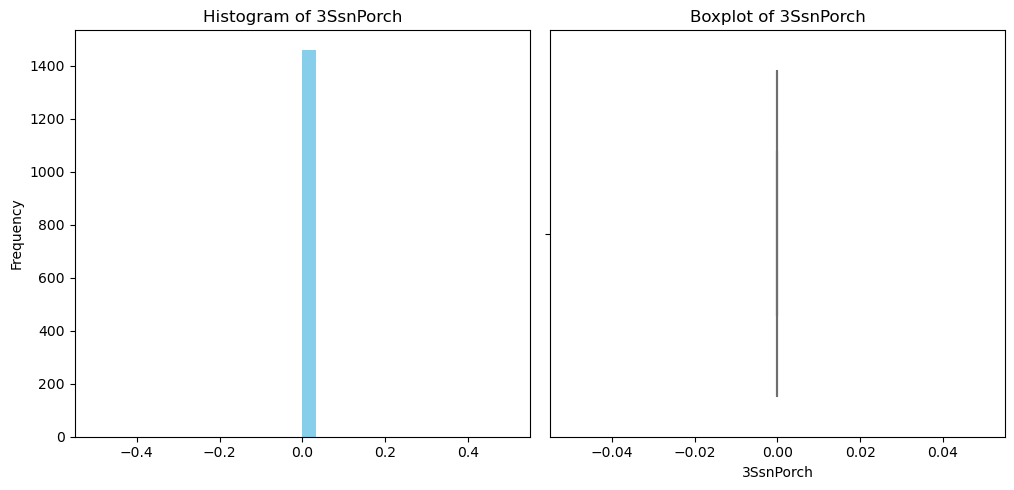

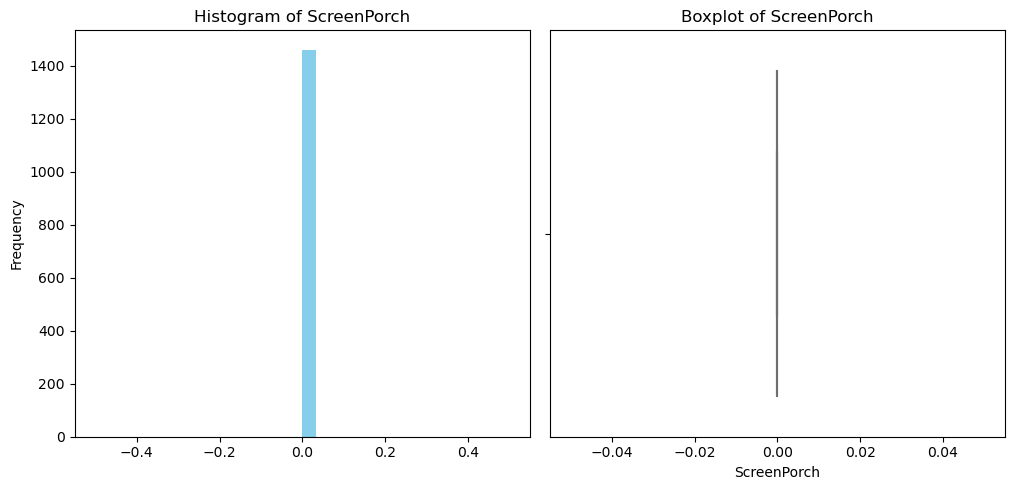

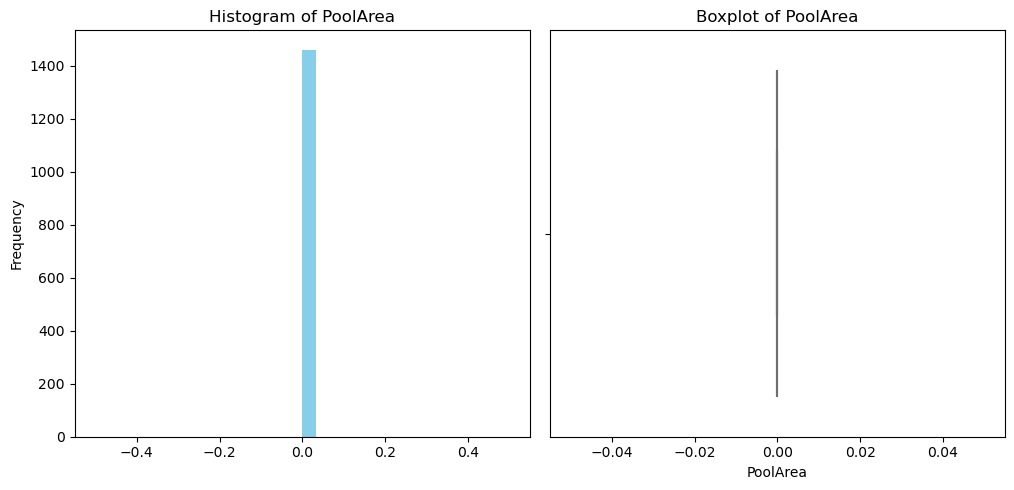

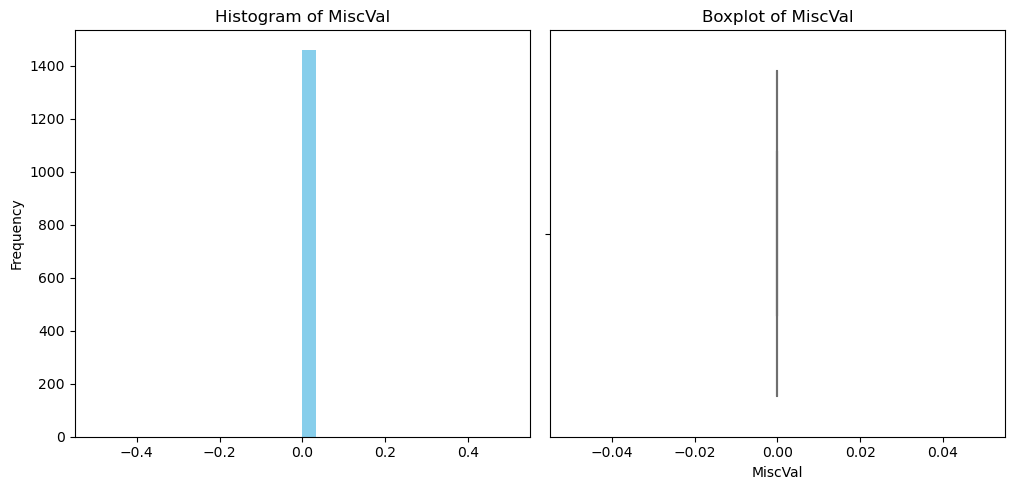

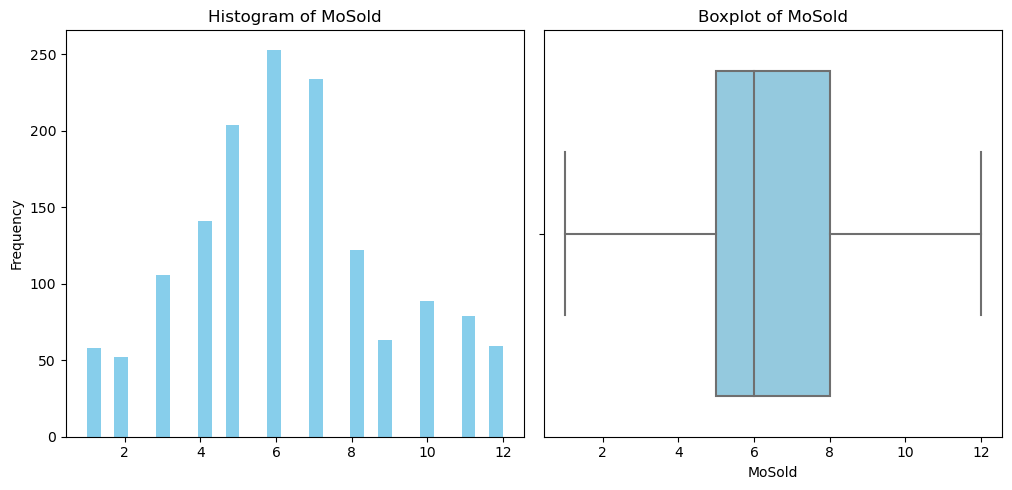

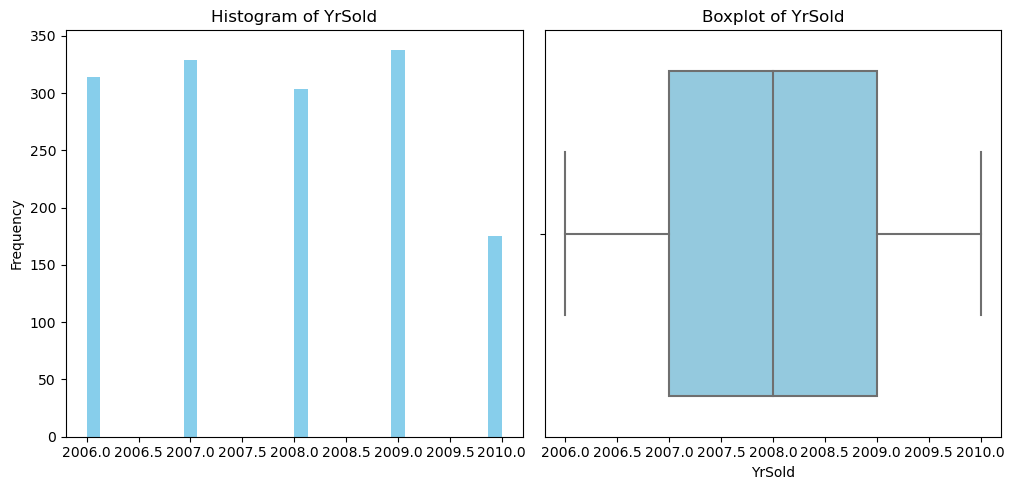

In [234]:
plot_detect_outliers (numerical_columns)

In [235]:
print("Train data:")
calculate_outliers_percentage(X)
print("Test data:")
calculate_outliers_percentage(test)

Train data:
Percentage of outliers in MSSubClass: 0.00%
Percentage of outliers in LotFrontage: 0.00%
Percentage of outliers in LotArea: 0.00%
Percentage of outliers in OverallQual: 0.00%
Percentage of outliers in OverallCond: 0.00%
Percentage of outliers in YearBuilt: 0.00%
Percentage of outliers in YearRemodAdd: 0.00%
Percentage of outliers in MasVnrArea: 0.00%
Percentage of outliers in BsmtFinSF1: 0.00%
Percentage of outliers in BsmtFinSF2: 0.00%
Percentage of outliers in BsmtUnfSF: 0.00%
Percentage of outliers in TotalBsmtSF: 0.00%
Percentage of outliers in 1stFlrSF: 0.00%
Percentage of outliers in 2ndFlrSF: 0.00%
Percentage of outliers in LowQualFinSF: 0.00%
Percentage of outliers in GrLivArea: 0.00%
Percentage of outliers in BsmtFullBath: 0.00%
Percentage of outliers in BsmtHalfBath: 0.00%
Percentage of outliers in FullBath: 0.00%
Percentage of outliers in HalfBath: 0.00%
Percentage of outliers in BedroomAbvGr: 0.00%
Percentage of outliers in KitchenAbvGr: 0.00%
Percentage of outl

#### <p style="background-color: #EDE7F6; color: #6600ff;margin:0; display:inline-block;padding:.6rem;border-radius:.25rem;">C5.Encoding Categorical</p>

In [236]:
categorical_columns = X.select_dtypes(include=['category', 'object']).columns
categorical_columns

Index(['Neighborhood', 'Condition1', 'Condition2', 'HouseStyle', 'RoofStyle',
       'RoofMatl', 'Exterior1st', 'Exterior2nd', 'Foundation', 'BsmtFinType1',
       'BsmtFinType2', 'Heating', 'Functional', 'GarageType', 'SaleType',
       'SaleCondition'],
      dtype='object')

In [239]:
from sklearn.preprocessing import OrdinalEncoder

encoder = OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=-1)

X[categorical_columns] = encoder.fit_transform(X[categorical_columns].astype(str))
test[categorical_columns] = encoder.fit_transform(test[categorical_columns].astype(str))

In [240]:
X.head(3)

,MSSubClass,LotFrontage,LotArea,Neighborhood,Condition1,Condition2,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrArea,Foundation,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Functional,Fireplaces,GarageType,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,...,ExterQual_TA,ExterCond_Ex,ExterCond_Fa,ExterCond_Gd,ExterCond_Po,ExterCond_TA,BsmtQual_Ex,BsmtQual_Fa,BsmtQual_Gd,BsmtQual_TA,BsmtCond_Fa,BsmtCond_Gd,BsmtCond_Po,BsmtCond_TA,BsmtExposure_Av,BsmtExposure_Gd,BsmtExposure_Mn,BsmtExposure_No,HeatingQC_Ex,HeatingQC_Fa,HeatingQC_Gd,HeatingQC_Po,HeatingQC_TA,CentralAir_N,CentralAir_Y,Electrical_FuseA,Electrical_FuseF,Electrical_FuseP,Electrical_Mix,Electrical_SBrkr,KitchenQual_Ex,KitchenQual_Fa,KitchenQual_Gd,KitchenQual_TA,GarageFinish_Fin,GarageFinish_RFn,GarageFinish_Unf,GarageQual_Ex,GarageQual_Fa,GarageQual_Gd,GarageQual_Po,GarageQual_TA,GarageCond_Ex,GarageCond_Fa,GarageCond_Gd,GarageCond_Po,GarageCond_TA,PavedDrive_N,PavedDrive_P,PavedDrive_Y
0,60,65.0,8450.0,5.0,2.0,2.0,5.0,7,5.0,2003,2003,1.0,1.0,12.0,13.0,196.0,2.0,2.0,706.0,5.0,0,150.0,856,1.0,856.0,854,0,1710.0,1.0,0,2,1,3.0,1,8,6.0,0.0,1.0,2003.0,2.0,548.0,0,61,0,0,0,0,0,2,2008,...,False,False,False,False,False,True,False,False,True,False,False,False,False,True,False,False,False,True,True,False,False,False,False,False,True,False,False,False,False,True,False,False,True,False,False,True,False,False,False,False,False,True,False,False,False,False,True,False,False,True
1,20,80.0,9600.0,24.0,1.0,2.0,2.0,6,7.5,1976,1976,1.0,1.0,8.0,8.0,0.0,1.0,0.0,978.0,5.0,0,284.0,1262,1.0,1262.0,0,0,1262.0,0.0,0,2,0,3.0,1,6,6.0,1.0,1.0,1976.0,2.0,460.0,298,0,0,0,0,0,0,5,2007,...,True,False,False,False,False,True,False,False,True,False,False,False,False,True,False,True,False,False,True,False,False,False,False,False,True,False,False,False,False,True,False,False,False,True,False,True,False,False,False,False,False,True,False,False,False,False,True,False,False,True
2,60,68.0,11250.0,5.0,2.0,2.0,5.0,7,5.0,2001,2002,1.0,1.0,12.0,13.0,162.0,2.0,2.0,486.0,5.0,0,434.0,920,1.0,920.0,866,0,1786.0,1.0,0,2,1,3.0,1,6,6.0,1.0,1.0,2001.0,2.0,608.0,0,42,0,0,0,0,0,9,2008,...,False,False,False,False,False,True,False,False,True,False,False,False,False,True,False,False,True,False,True,False,False,False,False,False,True,False,False,False,False,True,False,False,True,False,False,True,False,False,False,False,False,True,False,False,False,False,True,False,False,True


#### <p style="background-color: #EDE7F6; color: #6600ff;margin:0; display:inline-block;padding:.6rem;border-radius:.25rem;">C6.Normalizing - Scaling Data (optional)</p>

In [241]:
scaler = MinMaxScaler()
X = pd.DataFrame(scaler.fit_transform(X), columns=X.columns)
test = pd.DataFrame(scaler.fit_transform(test), columns=test.columns)

#### <p style="background-color: #EDE7F6; color: #6600ff;margin:0; display:inline-block;padding:.6rem;border-radius:.25rem;">C7.Feature Selections</p>

In [ ]:
X.info()

In [242]:
discrete_features = X.dtypes == int


def mi_score_maker(X, y, discrete_features):
    scores = mutual_info_classif(X, y, discrete_features=discrete_features)
    df = pd.DataFrame({
        'Features': X.columns,
        'Scores': scores
    })
    df = df.sort_values(['Scores'], ascending=False).reset_index(drop=True)
    return df

In [428]:
mi_scores = mi_score_maker(X, y, discrete_features)
mi_scores

,Features,Scores
0,Condition2,3.274205
1,RoofMatl,3.154095
2,Heating,2.978580
3,GarageQual_TA,2.928930
4,LandSlope_Gtl,2.889544
5,Functional,2.874564
6,BsmtCond_TA,2.838058
7,GarageCond_TA,2.805766
8,Electrical_SBrkr,2.799111
9,CentralAir_Y,2.784161


In [429]:
a = mi_scores[mi_scores.Scores>0.01].set_index('Features')

In [430]:
a.T.columns

Index(['Condition2', 'RoofMatl', 'Heating', 'GarageQual_TA', 'LandSlope_Gtl',
       'Functional', 'BsmtCond_TA', 'GarageCond_TA', 'Electrical_SBrkr',
       'CentralAir_Y', 'SaleType', 'PavedDrive_Y', 'LandContour_Lvl',
       'BsmtFinType2', 'SaleCondition', 'Condition1', 'RoofStyle',
       'BldgType_1Fam', 'ExterCond_TA', 'FullBath', 'ExterQual_TA',
       'MSZoning_RL', 'GarageCars', 'GarageType', 'BsmtExposure_No',
       'LotConfig_Inside', 'LotShape_Reg', 'KitchenQual_TA', 'Foundation',
       'OverallQual', 'BsmtQual_TA', 'GarageFinish_Unf', 'BedroomAbvGr',
       'OverallCond', 'HeatingQC_Ex', 'KitchenQual_Gd', 'HouseStyle',
       'Fireplaces', 'BsmtQual_Gd', 'ExterQual_Gd', 'TotRmsAbvGrd', 'HalfBath',
       'BsmtFinType1', 'GrLivArea', 'Exterior2nd', 'BsmtFullBath',
       'Exterior1st', 'HeatingQC_TA', 'YearBuilt', 'GarageArea', 'TotalBsmtSF',
       'YearRemodAdd', 'Neighborhood', 'GarageYrBlt', 'LotFrontage',
       'MSSubClass', 'LotShape_IR1', 'GarageFinish_RFn', 'YrS

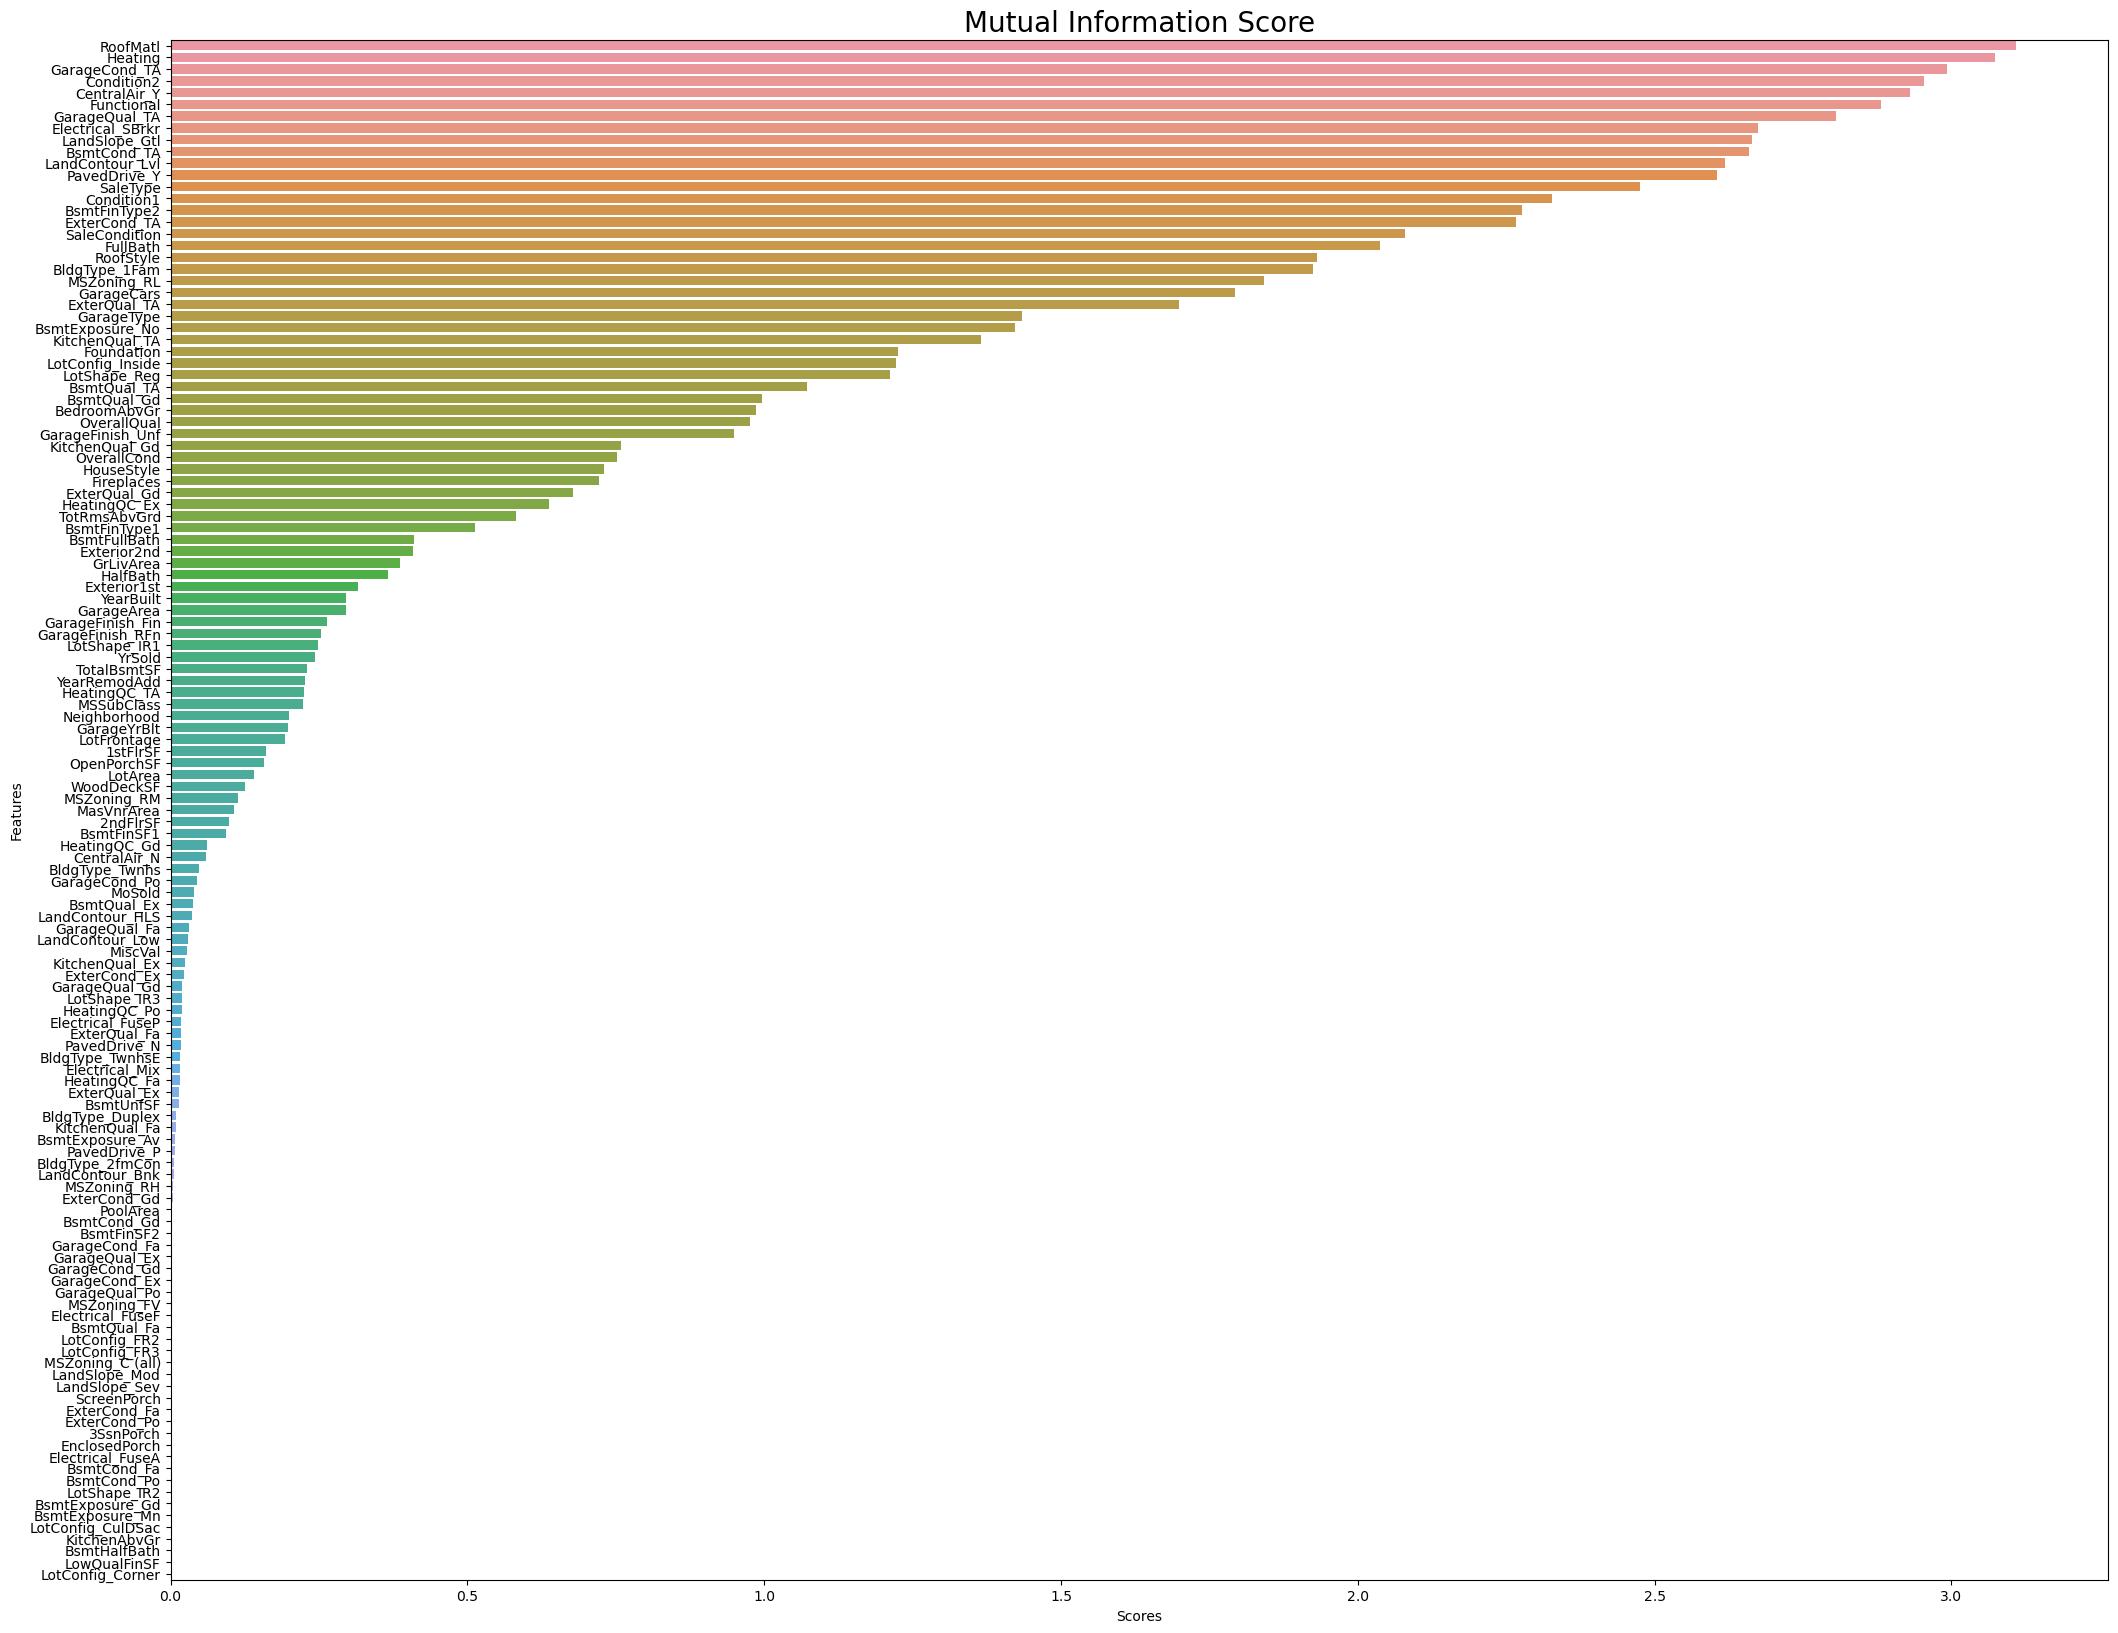

In [246]:
plt.figure(figsize=(25, 20))
sns.barplot(x="Scores", y="Features", data=mi_scores)
plt.title("Mutual Information Score", size=20)
plt.show()

#### <p style="background-color: #EDE7F6; color: #6600ff;margin:0; display:inline-block;padding:.6rem;border-radius:.25rem;">C8.Delete unnecessary columns</p>

In [ ]:
# X = X.drop(["PassengerId", "Ticket"], axis=1).copy()
# test = test.drop(["PassengerId", "Ticket"], axis=1).copy()

### <p style="background-color: #EDE7F6; color: #6600ff;margin:0; display:inline-block;padding:.6rem;border-radius:.25rem;">II.MODEL ENGINEERING</p>

 #### <p style="background-color: #EDE7F6;color:#6600ff;display: inline-block;padding:.6rem;border-radius:.5rem">Import libraries</p>

In [305]:
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV, RandomizedSearchCV, StratifiedKFold,KFold,RepeatedStratifiedKFold,RepeatedKFold

from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder, StandardScaler, LabelEncoder, OrdinalEncoder
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer


from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier, RandomForestClassifier, RandomForestRegressor
from sklearn.neural_network import MLPClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.gaussian_process.kernels import RBF
from xgboost import XGBRegressor,XGBClassifier
from sklearn.linear_model import LinearRegression, LogisticRegression


from sklearn.metrics import mean_absolute_error, accuracy_score, r2_score
import optuna

#### <p style="background-color: #EDE7F6; color: #6600ff;margin:0; display:inline-block;padding:.6rem;border-radius:.25rem;">A.Model Training</p>

In [255]:
# splitting the training dataframe into x(features) and y (target)
X_train, X_valid, y_train, y_valid = train_test_split(X,y, train_size = 0.8, random_state=42)

#### <p style="background-color: #EDE7F6; color: #6600ff;margin:0; display:inline-block;padding:.6rem;border-radius:.25rem;">A1.XGBRegressor</p>

In [376]:
model_1 = XGBRegressor(random_state=42)
model_1.fit(X_train, y_train)
predictions_1 = model_1.predict(X_valid)
print(mean_absolute_error(y_valid, predictions_1))
model_1.score(X_train,y_train)

15628.012478298611


0.9998795345644704

In [377]:
model_1.score(X_valid,y_valid)

0.7845315373326004

#### <p style="background-color: #EDE7F6; color: #6600ff;margin:0; display:inline-block;padding:.6rem;border-radius:.25rem;">A2.RandomForestRegressor</p>

In [393]:
model_2 = RandomForestRegressor(random_state=42, oob_score=True)
model_2.fit(X_train, y_train)
predictions_2 = model_2.predict(X_valid)
print(mean_absolute_error(y_valid, predictions_2))
model_2.score(X_train,y_train)

15478.81055555556


0.9802725081648883

In [394]:
model_2.score(X_valid,y_valid)

0.8087096265711695

#### <p style="background-color: #EDE7F6; color: #6600ff;margin:0; display:inline-block;padding:.6rem;border-radius:.25rem;">B.Model Evaluation</p>

In [389]:
def Evaluating_the_model (model, predictions, X_train=X_train,y_train=y_train,X_valid=X_valid, y_valid=y_valid):
    print(f'Train Score:{model.score(X_train, y_train)}')
    print(f'Valid Score:{model.score(X_valid, y_valid)}')
    print(f'R-squared: {r2_score(y_valid, predictions)}')

    print(f'Mean Absolute Error: {mean_absolute_error(y_valid, predictions_1)}')
    print(f'Mean Squared Error: {mean_squared_error(y_valid, predictions_1)}')   

#### <p style="background-color: #EDE7F6; color: #6600ff;margin:0; display:inline-block;padding:.6rem;border-radius:.25rem;">B1.XGBRegressor</p>

In [395]:
Evaluating_the_model( model_1, predictions_1)

Train Score:0.9998795345644704
Valid Score:0.7845315373326004
R-squared: 0.7845315373326004
Mean Absolute Error: 15628.012478298611
Mean Squared Error: 700108530.9458097


#### <p style="background-color: #EDE7F6; color: #6600ff;margin:0; display:inline-block;padding:.6rem;border-radius:.25rem;">B2.RandomForestRegressor</p>

In [396]:
Evaluating_the_model(model_2, predictions_2)

Train Score:0.9802725081648883
Valid Score:0.8087096265711695
R-squared: 0.8087096265711695
Mean Absolute Error: 15628.012478298611
Mean Squared Error: 700108530.9458097


Wynik Out of Bag w RandomForest

Wynik bag score lub wynik OOB to rodzaj techniki walidacji, która jest głównie używana w algorytmach baggingu do walidacji algorytmu baggingu. Tutaj mała część danych walidacyjnych jest pobierana z głównego nurtu danych, a przewidywania dotyczące konkretnych danych walidacyjnych są wykonywane i porównywane z innymi wynikami.

Główną zaletą punktacji OOB jest to, że w tym przypadku dane walidacyjne nie są widoczne dla algorytmu baggingu, dlatego też wyniki uzyskane w punktacji OOB są prawdziwymi wynikami wskazującymi na rzeczywistą wydajność algorytmu baggingu.

Aby uzyskać wynik OOB konkretnego algorytmu Random Forest, należy ustawić wartość „True” dla parametru OOB_Score w algorytmie.

In [330]:
# Access the OOB Score
oob_score = model_2.oob_score_
print(f'Out-of-Bag Score: {oob_score}')

Out-of-Bag Score: 0.8516585211837471


In [333]:
# Evaluating the model
mse = mean_squared_error(y_valid, predictions_2)
print(f'Mean Squared Error: {mse}')

r2 = r2_score(y_valid, predictions_2)
print(f'R-squared: {r2}')

Mean Squared Error: 542603028.5063878
R-squared: 0.9073847918546671


#### <p style="background-color: #EDE7F6; color: #6600ff;margin:0; display:inline-block;padding:.6rem;border-radius:.25rem;">C.Model Tuning</p>

#### <p style="background-color: #EDE7F6; color: #6600ff;margin:0; display:inline-block;padding:.6rem;border-radius:.25rem;">C1.XGBRegressor - Optuna</p>

In [268]:
def objective(trial):
    params = {
        "objective": "reg:squarederror",
        "n_estimators": trial.suggest_int("n_estimators", 50, 10000),
#         "n_estimators": trial.suggest_int('n_estimators', 1000, 10000, 100),
        "verbosity": 0,
        "learning_rate": trial.suggest_float("learning_rate", 1e-3, 0.1, log=True),
        "max_depth": trial.suggest_int("max_depth", 2, 50),
#         "subsample": trial.suggest_float("subsample", 0.5, 1.0),
        "subsample": trial.suggest_discrete_uniform("subsample", 0.6, 1.0, 0.05),
        "colsample_bytree": trial.suggest_float("colsample_bytree", 0.05, 1.0),
        "min_child_weight": trial.suggest_int("min_child_weight", 1, 20),
        
        "reg_alpha": trial.suggest_int('reg_alpha', 1, 50),
        "reg_lambda": trial.suggest_int('reg_lambda', 5, 100),
#          "eta": trial.suggest_discrete_uniform('eta', 0.01, 0.1, 0.01),
    }

    model = XGBRegressor(**params, random_state=42)
#     model.fit(X_train, y_train, verbose=False)
    model.fit(X_train, y_train,eval_set=[(X_valid,y_valid)], early_stopping_rounds=150,verbose=False)
    predictions = model.predict(X_valid)
#     rmse = mean_absolute_error(y_valid, predictions)
    rmse = model.score(X_valid, y_valid)
    return rmse

In [270]:
study = optuna.create_study(direction='maximize', sampler=optuna.samplers.RandomSampler(seed=42))
study.optimize(objective, n_trials=30, show_progress_bar=True)

[I 2024-10-29 10:33:41,463] A new study created in memory with name: no-name-c435262a-7841-41dc-9995-0fc1d5a0f0b5


  0%|          | 0/30 [00:00<?, ?it/s]

[I 2024-10-29 10:33:45,693] Trial 0 finished with value: 0.9030454533618062 and parameters: {'n_estimators': 3777, 'learning_rate': 0.07969454818643935, 'max_depth': 37, 'subsample': 0.85, 'colsample_bytree': 0.19821770842031466, 'min_child_weight': 4, 'reg_alpha': 3, 'reg_lambda': 88}. Best is trial 0 with value: 0.9030454533618062.
[I 2024-10-29 10:33:47,303] Trial 1 finished with value: 0.8989582759157191 and parameters: {'n_estimators': 6031, 'learning_rate': 0.02607024758370768, 'max_depth': 3, 'subsample': 1.0, 'colsample_bytree': 0.8408205087604007, 'min_child_weight': 5, 'reg_alpha': 10, 'reg_lambda': 22}. Best is trial 0 with value: 0.9030454533618062.
[I 2024-10-29 10:33:58,969] Trial 2 finished with value: 0.9046360591470157 and parameters: {'n_estimators': 3077, 'learning_rate': 0.01120760621186057, 'max_depth': 23, 'subsample': 0.7, 'colsample_bytree': 0.6312602499862605, 'min_child_weight': 3, 'reg_alpha': 15, 'reg_lambda': 40}. Best is trial 2 with value: 0.9046360591470

[I 2024-10-29 10:37:06,830] Trial 25 finished with value: 0.866873833420204 and parameters: {'n_estimators': 6438, 'learning_rate': 0.0014732618059500203, 'max_depth': 9, 'subsample': 1.0, 'colsample_bytree': 0.6261076066766105, 'min_child_weight': 1, 'reg_alpha': 6, 'reg_lambda': 68}. Best is trial 3 with value: 0.9205086196003065.
[I 2024-10-29 10:37:07,111] Trial 26 finished with value: 0.18888778185757538 and parameters: {'n_estimators': 100, 'learning_rate': 0.002097085333143113, 'max_depth': 28, 'subsample': 0.9, 'colsample_bytree': 0.6693631965274706, 'min_child_weight': 5, 'reg_alpha': 36, 'reg_lambda': 27}. Best is trial 3 with value: 0.9205086196003065.
[I 2024-10-29 10:37:10,570] Trial 27 finished with value: 0.9045091853642006 and parameters: {'n_estimators': 3288, 'learning_rate': 0.031115931750282644, 'max_depth': 33, 'subsample': 0.95, 'colsample_bytree': 0.6747322476853262, 'min_child_weight': 12, 'reg_alpha': 5, 'reg_lambda': 40}. Best is trial 3 with value: 0.92050861

In [271]:
print('Best hyperparameters:', study.best_params)
print('Best RMSE:', study.best_value)

Best hyperparameters: {'n_estimators': 4588, 'learning_rate': 0.037183641805732096, 'max_depth': 11, 'subsample': 0.8, 'colsample_bytree': 0.6127938404189404, 'min_child_weight': 1, 'reg_alpha': 31, 'reg_lambda': 21}
Best RMSE: 0.9205086196003065


In [401]:
study.best_params2={'n_estimators': 4588, 'learning_rate': 0.037183641805732096, 'max_depth': 11, 'subsample': 0.8, 'colsample_bytree': 0.6127938404189404, 'min_child_weight': 1, 'reg_alpha': 31, 'reg_lambda': 21}

In [402]:
model_3 = XGBRegressor(**study.best_params2, random_state=42)
model_3.fit(X_train, y_train)
predictions_3 = model_3.predict(X_valid)
print(mean_absolute_error(y_valid, predictions_3))
model_3.score(X_train,y_train)

13768.268988715277


0.9999999358194149

In [403]:
model_3.score(X_valid,y_valid)

0.8106432358779928

In [404]:
Evaluating_the_model(model_3, predictions_3)

Train Score:0.9999999358194149
Valid Score:0.8106432358779928
R-squared: 0.8106432358779928
Mean Absolute Error: 15628.012478298611
Mean Squared Error: 700108530.9458097


#### <p style="background-color: #EDE7F6; color: #6600ff;margin:0; display:inline-block;padding:.6rem;border-radius:.25rem;">C2.RandomForestRegressor - Optuna</p>

In [289]:
# Define objective function
def objective(trial):
    # Suggest values for hyperparameters
    n_estimators = trial.suggest_int("n_estimators", 10, 10000, log=True)
    min_samples_split = trial.suggest_int("min_samples_split", 2, 32)
    min_samples_leaf = trial.suggest_int("min_samples_leaf", 2, 32)
    max_depth = trial.suggest_int("max_depth", 1, 50)
    max_features = trial.suggest_categorical('max_features', ['sqrt', 'log2'])
    criterion = trial.suggest_categorical('criterion', ["squared_error", "absolute_error", "friedman_mse", "poisson"])
    bootstrap = trial.suggest_categorical('bootstrap', [True, False])
    
    # Create and fit random forest model
    model = RandomForestRegressor(
    n_estimators=n_estimators,
    max_depth=max_depth,
    min_samples_split=min_samples_split,
    min_samples_leaf=min_samples_leaf,
    max_features=max_features,
    criterion=criterion,
    bootstrap=bootstrap,
    random_state=42,
    )
    model.fit(X_train, y_train)


#     y_pred = model.predict(X_valid)
#     rmse = np.sqrt(mean_squared_error(y_valid, y_pred))
#     mae = mean_absolute_error(y_valid, y_pred)
#     r2 = r2_score(y_valid, y_pred)

    rmse = model.score(X_valid, y_valid)
    return rmse

In [290]:
study = optuna.create_study(direction='maximize', sampler=optuna.samplers.RandomSampler(seed=42))
study.optimize(objective, n_trials=30, show_progress_bar=True)

[I 2024-10-29 10:49:31,089] A new study created in memory with name: no-name-cabb1daa-fa4b-451f-8114-a2ea584e6ae7


  0%|          | 0/30 [00:00<?, ?it/s]

[I 2024-10-29 10:49:33,325] Trial 0 finished with value: 0.7572754390444655 and parameters: {'n_estimators': 99, 'min_samples_split': 31, 'min_samples_leaf': 24, 'max_depth': 30, 'max_features': 'sqrt', 'criterion': 'absolute_error', 'bootstrap': False}. Best is trial 0 with value: 0.7572754390444655.
[I 2024-10-29 10:49:36,580] Trial 1 finished with value: 0.8175465809035414 and parameters: {'n_estimators': 1750, 'min_samples_split': 8, 'min_samples_leaf': 7, 'max_depth': 10, 'max_features': 'log2', 'criterion': 'friedman_mse', 'bootstrap': False}. Best is trial 1 with value: 0.8175465809035414.
[I 2024-10-29 10:49:36,945] Trial 2 finished with value: 0.8102668043300536 and parameters: {'n_estimators': 166, 'min_samples_split': 26, 'min_samples_leaf': 8, 'max_depth': 26, 'max_features': 'sqrt', 'criterion': 'poisson', 'bootstrap': True}. Best is trial 1 with value: 0.8175465809035414.
[I 2024-10-29 10:49:37,958] Trial 3 finished with value: 0.724325209824729 and parameters: {'n_estima

[I 2024-10-29 10:52:17,521] Trial 28 finished with value: 0.7729115774969871 and parameters: {'n_estimators': 2022, 'min_samples_split': 23, 'min_samples_leaf': 16, 'max_depth': 5, 'max_features': 'sqrt', 'criterion': 'poisson', 'bootstrap': True}. Best is trial 21 with value: 0.841833280984085.
[I 2024-10-29 10:52:18,673] Trial 29 finished with value: 0.7593063043385315 and parameters: {'n_estimators': 99, 'min_samples_split': 21, 'min_samples_leaf': 17, 'max_depth': 43, 'max_features': 'sqrt', 'criterion': 'absolute_error', 'bootstrap': True}. Best is trial 21 with value: 0.841833280984085.


In [291]:
print('Best hyperparameters:', study.best_params)
print('Best RMSE:', study.best_value)

Best hyperparameters: {'n_estimators': 1967, 'min_samples_split': 11, 'min_samples_leaf': 7, 'max_depth': 28, 'max_features': 'sqrt', 'criterion': 'poisson', 'bootstrap': False}
Best RMSE: 0.841833280984085


In [397]:
model_4 = RandomForestRegressor(**study.best_params, random_state=42)
model_4.fit(X_train, y_train)
predictions_4 = model_4.predict(X_valid)
print(mean_absolute_error(y_valid, predictions_4))
model_4.score(X_train,y_train)

14760.894740588717


0.9077023461798813

In [398]:
model_4.score(X_valid,y_valid)

0.8124590069185524

In [405]:
Evaluating_the_model(model_4, predictions_4)

Train Score:0.9077023461798813
Valid Score:0.8124590069185524
R-squared: 0.8124590069185524
Mean Absolute Error: 15628.012478298611
Mean Squared Error: 700108530.9458097


#### <p style="background-color: #EDE7F6; color: #6600ff;margin:0; display:inline-block;padding:.6rem;border-radius:.25rem;">E.Feature Importance for the best model</p>

In [408]:
from sklearn.feature_selection import RFE

ValueError: Classification metrics can't handle a mix of multiclass and continuous targets

In [410]:
rfe = RFE(model_3, n_features_to_select=1)
rfe.fit(X_train, y_train)

KeyboardInterrupt: 

In [ ]:
df_rfe = pd.concat([pd.DataFrame(X_train.columns, columns=['feat']),
                    pd.DataFrame(rfe.ranking_, columns=['rank'])
                   ], axis=1).sort_values(by='rank')
 
df_rfe

In [411]:
r2_score_all = r2_score(y_valid, predictions_3)
print(r2_score_all)

0.8106432358779928


In [ ]:
rfe_r2_score_list = []

for k in range(1, 132):
    RFE_selector = RFE(estimator=model_3, n_features_to_select=k, step=10)
    RFE_selector.fit(X_train, y_train)
    
    sel_X_train = RFE_selector.transform(X_train)
    sel_X_valid = RFE_selector.transform(X_valid)
    
    model_3.fit(sel_X_train, y_train)
    RFE_preds = model_3.predict(sel_X_valid)
    
    f2_score_rfe = r2_score(y_valid, RFE_preds)
    
    rfe_r2_score_list.append(f2_score_rfe)

In [ ]:
x = pd.DataFrame(df_rfe).head(10)
col_10 = x['feat'].values
col_10

In [ ]:
X_train = X_train[col_10]
X_valid = X_valid[col_10]
test=test[col_10]

### <p style="background-color: #EDE7F6; color: #6600ff;margin:0; display:inline-block;padding:.6rem;border-radius:.25rem;">III.MODEL DEPLOYMENT</p>

In [ ]:
test_predictions = model_22.predict(test)

# Prepare submission file
submission_df = pd.DataFrame({
    "PassengerId": range(892, 892 + len(test_predictions)),
    "Survived": test_predictions
})

# Save submission file
submission_df.to_csv("submission_22_m22_none_bez_ticket_rfe11.csv", index=False)